# MSDS 458 AI/DL CNN 
 

### Number/Letter/Shape Classification

***
#### NOTES:
####   1. program to classify a combined dataset consisting of:
* the MNIST numbers dataset (digits 0-9) 
* the MNIST letters dataset (letters A-Z) 
* a shapes dataset (squares, circles and triangles) 

####   2. this is a keras/tensorflow 2.X program 
####   3. this is a python 3.X code program

<img src="https://www.python.org/static/community_logos/python-logo-generic.svg"/>





<br><br><br>
# 0) OVERVIEW

### this program creates a combined dataset with digits, letters and shapes for training and testing a keras/tensorflow convolutional neural network. a base model is provided which presents one of the objectives; improve model performance. some layer visualization code utilizing the keract module is also included. use these layer visualizations to help understand how the model is working. these visualizations will help you to see the effects of your models as you develop new ones
### this program is a template, showing base functionality. you should explore

<br><br><br>
# 1) PREPARATION

### set cell width and height

In [54]:
# set cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# set cell output window height
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 160em;} </style>"))

### import modules

### NOTE: 
#### modules keras-extra-datasets and keract are utilized below and may also need to be pip installed. the following commands show the necessary syntax. when running python, when you get an error like 'ModuleNotFoundError' it is usually due to a module which needs to be imported
#### pip install keract
#### pip install keras-extra-datasets

In [55]:
# import modules
import os
import sys
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from timeit import default_timer as timer
import time

# import tensorflow/keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,InputLayer, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras import regularizers

# NOTE: modules keras-extra-datasets and keract are utilized below and may also need to be pip installed
# pip install keract
# pip install keras-extra-datasets

In [56]:
# do we have GPUs available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


### verify versions and set some options

In [57]:
print('Python version')
print (sys.version)

print('Tensorflow version')
print(tf.__version__)

# set output line width
np.set_printoptions(linewidth=168)
# set default for keras to float
tf.keras.backend.set_floatx('float64')

# if you want repeatability with random weights
np.random.seed(2016)  

tf.autograph.set_verbosity(0)

Python version
3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]
Tensorflow version
2.3.0


<br><br><br>
# 2) NUMBERS DATA

### load numbers data

In [58]:
# load mnist training and testing datasets containing labeled handwritten numbers
#   see http://yann.lecun.com/exdb/mnist/ for details
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

### what is type and shape of the numbers data

In [59]:
print(type(x_train))
print(type(y_train))
print(x_train.shape) # train mage
print(y_train.shape) # train label
print(x_test.shape)  # test image
print(y_test.shape)  # test label

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### what does the data look like

In [60]:
# print some of the raw data elements in training images and labels where we can
#   see each pixel is a number between 0 (white) to 255 (black) with gray scale in-between 

# change this number to print more or less elements from the training dataset
numberOfTrainingElementsToPrint = 4

for trainingIndx in range(numberOfTrainingElementsToPrint):
    print('\n\ntraining image ' + str(trainingIndx) + ' is number ' + str(y_train[trainingIndx]))
    print(x_train[trainingIndx])



training image 0 is number 5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253

### normalize data

In [61]:
# get min/max
traintestMax = np.maximum(x_train.max(),x_test.max())
traintestMin = np.minimum(x_train.min(),x_test.min())
print('minimum value = '+str(traintestMin))
print('maximum value = '+str(traintestMax))

minimum value = 0
maximum value = 255


In [62]:
# normalize input from 0-255 to 0.0-1.0. given the use of small weights in the model and the use of error between
#   predictions and expected values, the scale of inputs and outputs used to train the model are an important
#   factor. Unscaled input variables can result in a slow or unstable learning process
x_train, x_test = x_train / traintestMax, x_test / traintestMax

### how many of each number (0-9) do we have

Training data...
Unique Values :  [0 1 2 3 4 5 6 7 8 9]
Occurrence Count :  [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]

Testing data...
Unique Values :  [0 1 2 3 4 5 6 7 8 9]
Occurrence Count :  [ 980 1135 1032 1010  982  892  958 1028  974 1009]


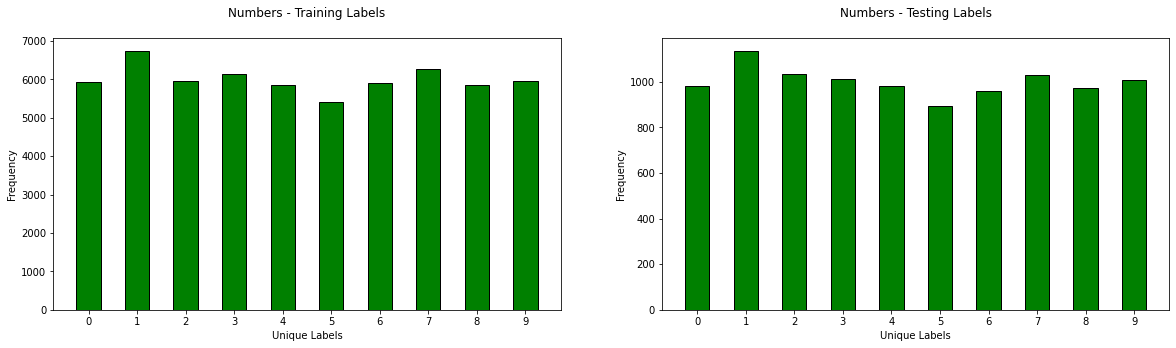

In [63]:
# training data
uniqueValues, occurCount = np.unique(y_train, return_counts=True)
numbersUniqueValues = uniqueValues
print('Training data...')
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

fig = plt.figure(figsize = (20, 5)) 
plt.subplot(121)
plt.bar(uniqueValues, occurCount, color ='green', width=0.5, edgecolor = 'black') 
plt.xlabel("Unique Labels") 
plt.ylabel("Frequency") 
plt.xticks(range(len(uniqueValues)),uniqueValues) 
plt.title("Numbers - Training Labels\n") 

# testing data
print('\nTesting data...')
uniqueValues, occurCount = np.unique(y_test, return_counts=True)
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

plt.subplot(122)
plt.bar(uniqueValues, occurCount, color ='green',  width = 0.5, edgecolor ='black') 
plt.xlabel("Unique Labels") 
plt.ylabel("Frequency") 
plt.xticks(range(len(uniqueValues)),uniqueValues) 
plt.title("Numbers - Testing Labels\n") 
plt.show() 

### plot some examples of data

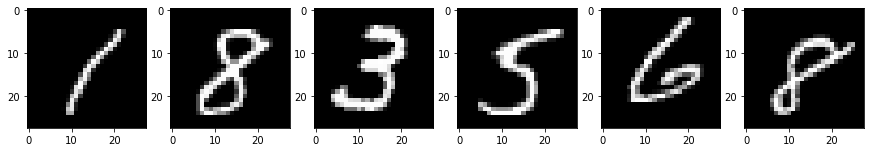

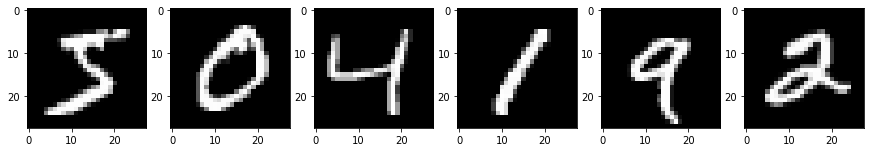

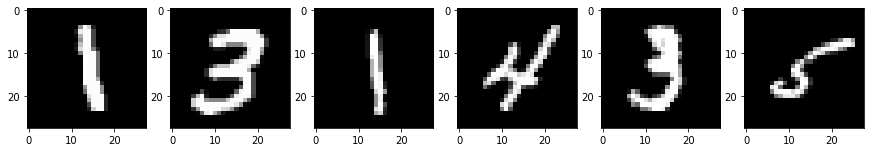

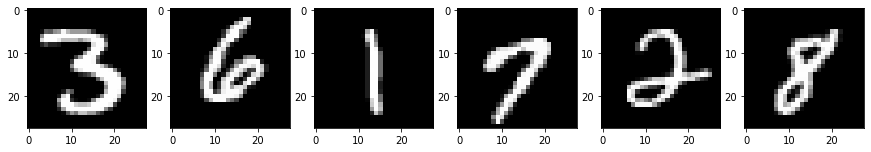

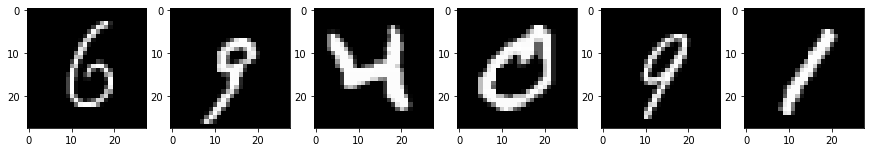

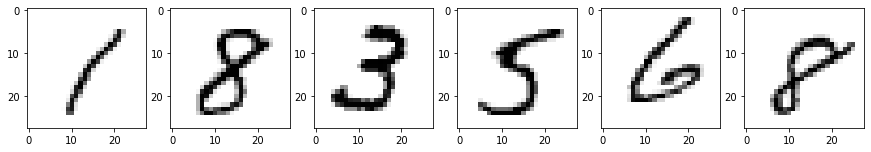

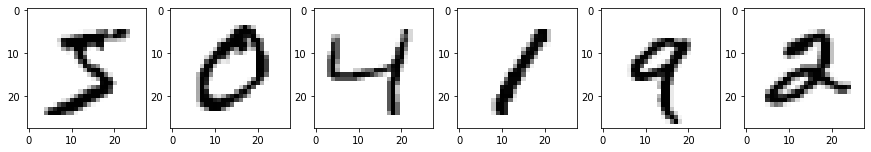

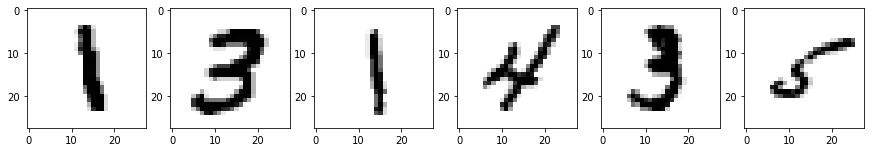

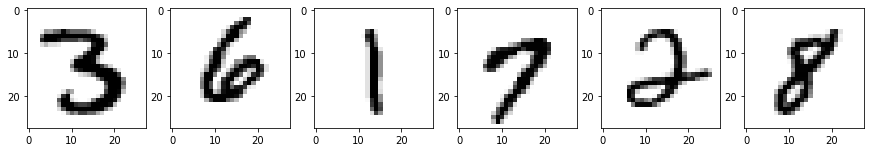

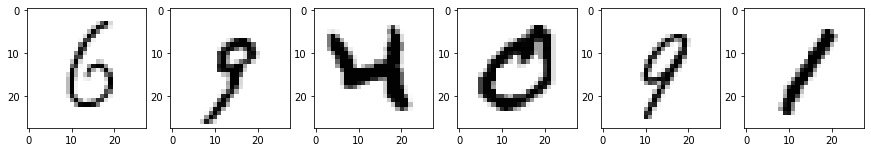

In [64]:
# print some of the data elements graphically to get a better visualization of what we have

numInRow = 6
numRows = 5

for rowIndx in range(numRows):
    figure, ax1 = plt.subplots(nrows=1, ncols=numInRow, figsize=(15,15))
    for colIndx in range(numInRow):
        ax1 = plt.subplot(100 + numInRow*10 + colIndx + 1) 
        plt.imshow(np.array(x_train[(rowIndx-1)*numInRow + colIndx], dtype='float').reshape((28, 28)), cmap='gray')    
    plt.show()

# can also make black on white
for rowIndx in range(numRows):
    figure, ax1 = plt.subplots(nrows=1, ncols=numInRow, figsize=(15,15))
    for colIndx in range(numInRow):
        ax1 = plt.subplot(100 + numInRow*10 + colIndx + 1) 
        plt.imshow(np.array(x_train[(rowIndx-1)*numInRow + colIndx], dtype='float').reshape((28, 28)), cmap='gray_r')    
    plt.show()

<br><br><br>
# 3) SHAPES DATA

### get shapes data 
### the shapes data is from kaggle. due to the limited number of shapes, we are creating additional permutations from these. two steps are performed to create these additional permutations, first, shape is rotated and outputted, and then is put into the top left, outputted, then shifted down a variable 'verticalOffsetToShift' and outputted until it reaches the lower bounds (27), then shifted vertically to top, and shifted right a variable 'horizontalOffsetToShift' and the process is repeated  

### unlike the numbers and letters, we do not have the data in separate train and test datasets. and we will actually merge all our train and test data into a single dataset which is all numbers, shapes and letters, and then divide this into a train and test dataset. also, unlike the numbers and letters, this dataset is already normalized (0-1 vs 0-255)

In [65]:
# get shapes
# https://www.kaggle.com/cactus3/basicshapes
# No Copyright - The person who associated a work with this has dedicated the work to the public domain 
#                by waiving all of his or her rights to the work worldwide under copyright law, including all 
#                related and neighboring rights, to the extent allowed by law. You can copy, modify, distribute
#                and perform the work, even for commercial purposes, all without asking permission.

# function to 
def rgb2gray(img):
    # return np.dot(img[...,:3], [0.299, 0.587, 0.114])
    return(img[:,:,0])

# function to get file in path
def files(path):  
    for file in os.listdir(path):
        if os.path.isfile(os.path.join(path, file)):
            yield file

# function to print shapes
def printShapes(folder):
    for file in files(folder):  
        img = mpimg.imread(folder + '/' + file)
        # gray = gray[0:783]
        imgplot = plt.imshow(img,cmap = 'gray')
        plt.show()
    return()

# initialize array to size 100000 28X28 zeros
shapesList = np.zeros((100000,28,28))
# initialize labels
shapesLabels = []

# set this folder to the folder where your shapes are
baseFolder = "/home/jovyan/Northwestern/MSDS458/Spring2020/CNN_Shapes/shapes/"
# there are three types of shapes we are loading
shapeFolders = ['squares','circles','triangles']

# shapesLabs (labels) will be:
#   squares:   10
#   circles:   11
#   triangles: 12
shapeLabs = [10, 11, 12]

# read shapes
# create additional shape permutations from the base of 100 circles, 100
#   triangles and 100 squares
# for each shape read, we rotate 0, 90, 180 and 270 degrees, assign label,
#   and then move shape to top left of 28X28, and then move down vertically
#   'verticalOffsetToShift'cells at a time until we reach the lower limit
#   and then move right 'horizontalOffsetToShift' cells starting back at 
#   the top until we have cycled thru all possible permutations of the shape
# note: 'verticalOffSetToShift' and 'horizontalOffsetToShift' are both set
#   to 3 which generates a range of shapes relatively consistent with the
#   numbers and letters. Decreasing these numbers will increase the number
#   of shapes generated. Increasing these numbers will decrease the number 
#   of shapes generated. Additionally, there is another variable which is
#   applied for the square shapes, and which is added to the variables for
#   shifting 'verticalOffsetToShift' and 'horizontalOffsetToShift' which 
#   increases these numbers and decreases the number of square shapes which
#   are generated to keep them balanced with the other shapes

# this is a counter for the squares, then circles, then triangles
currentShapeCounter = 0
# this is a counter for the current active shape we are creating
cnt = 0

# create offset permutations
createOffsetPermutations = True
# these two variables are the offsets to shift vertically and horizontally
horizontalOffsetToShift = 3
verticalOffsetToShift = 3

for shapeFolder in shapeFolders:
    for file in files(baseFolder + shapeFolder):  
        img = mpimg.imread(baseFolder + shapeFolder + '/' + file)
        
        for indxRotate in range(4):
            # first rotate 0 (no change), then 1, 2 and 3 which
            #   represent 0, 90, 180, and 270 degrees
            shapesList[cnt,:,:] = np.rot90(img[:,:,0],indxRotate)
            baseCnt = cnt
            # append label
            shapesLabels.append(shapeLabs[currentShapeCounter])

            if createOffsetPermutations:
                # now how much distance to right, left, top and bottom is there for the shape
                colMins = np.argmin(shapesList[cnt,:,:], axis=0)
                firstColOfShape = np.argmax(colMins>0)
                lastColOfShape = len(colMins) - np.argmax(colMins[::-1]>0)-1
            
                rowMins = np.argmin(shapesList[cnt,:,:], axis=1)
                firstRowOfShape = np.argmax(rowMins>0)
                lastRowOfShape = len(rowMins) - np.argmax(rowMins[::-1]>0)-1
           
                # we can move this shape left firstColOfShape and up firstRowOfShape
                # and then move to the right and down to create permutations of shape
                cnt = cnt + 1
            
                rangeRight = lastColOfShape - firstColOfShape + 1
                rangeDown = lastRowOfShape - firstRowOfShape + 1
            
                # due to shape, we have more squares 'replicated' so adjust the offset to a larger value for squares
                shapeSquareOffset = 0
                if currentShapeCounter == 0:
                    shapeSquareOffset = 1
                numberOfPermsToCreate = rangeRight * rangeDown
                for baseLeft in range(0, 28 - rangeRight + 1, horizontalOffsetToShift + shapeSquareOffset):
                    for baseTop in range(0, 28 - rangeDown + 1, verticalOffsetToShift + shapeSquareOffset):
                        shapesList[cnt,:,:] = np.ones(784).reshape((28, 28))
                
                        for indxRight in range(rangeRight):
                            for indxDown in range(rangeDown):
                                if (shapesList[baseCnt,firstRowOfShape+indxDown,firstColOfShape+indxRight] != 1):
                                    shapesList[cnt,baseTop+indxDown,baseLeft+indxRight] = shapesList[baseCnt,firstRowOfShape+indxDown,firstColOfShape+indxRight]
                                
                        shapesLabels.append(shapeLabs[currentShapeCounter])
                        cnt = cnt + 1
                        
    currentShapeCounter = currentShapeCounter + 1            
    
# set shapesList dimension to number of shapes
# keep only those defined
shapesList = shapesList[0:cnt,:,:]
print(shapesList.shape)
print(len(shapesLabels))

# invert to match letters and numbers
shapesList = 1.0 - shapesList 

(18924, 28, 28)
18924


### what does the data look like (notes: this will show this data is already normalized and print was rounded to 2 decimal places so the rows fit)

In [66]:
# shapes
print(shapesList.shape)
print(len(shapesLabels))

# print some of the raw data elements in training images and labels where we can
#   see each pixel is a number between 0 (white) to 255 (black) with gray scale in-between 

# change this number to print more or less elements from the training dataset
elementsToPrint = [0,int(shapesList.shape[0]/3)-1,int(shapesList.shape[0]/2)-1,int(shapesList.shape[0]/1,)-1]

for indx in elementsToPrint:
    print('\n\nimage ' + str(indx) + ' is shape ' + str(shapesLabels[indx]) + ' (' + ['square','circle','triangle'][shapesLabels[indx]-10] + ')')
    print(np.around(shapesList[indx],2))

(18924, 28, 28)
18924


image 0 is shape 10 (square)
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.02 0.3  0.31 0.31 0.4  0.42 0.5  0.51 0.6  0.62 0.61 0.65 0.76 0.83 0.74 0.22 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.27 0.86 0.64 0.63 0.55 0.51 0.42 0.4  0.32 0.29 0.28 0.25 0.14 0.08 0.44 0.42 0.01 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.28 0.61 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.28 0.51 0.05 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.27 0.6  0.   0.   0.   0.   0.   0.   0.   0.   0.

### before we randomize the shapes, we'll print some to show an example of the generation of new shapes. The first one printed is the base shape, and then you can see it moved to the top, and continually shifted down until it reaches the bottom, and then shifts right and starts over again. You can then see below in the third row second column the shape is rotated 90 degrees and the process is repeated

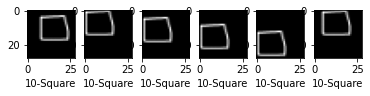

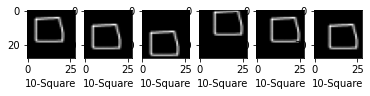

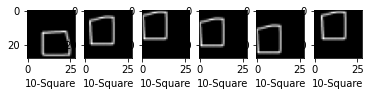

In [67]:
# print some of the data elements graphically to get a better visualization of what we have

numInRow = 6
numRows = 3

for rowIndx in range(numRows):
    for colIndx in range(numInRow):
        ax1 = plt.subplot(100 + numInRow*10 + colIndx + 1) 
        plt.xlabel(['10-Square','11-Circle','12-Triangle'][shapesLabels[rowIndx*numInRow + colIndx]-10])
        plt.imshow(np.array(shapesList[rowIndx*numInRow + colIndx], dtype='float').reshape((28, 28)), cmap='gray')    
    plt.show()

### randomize the shapes

In [68]:
# last step...randomize our shapes
# set seed for repeatability
np.random.seed(123)
shuffler = np. random. permutation(len(shapesLabels))
shapesLabels =  [shapesLabels[i] for i in shuffler]
shapesList = shapesList[shuffler]

### how many of each do we have

Training and Testing data data...
Unique Values :  [10 11 12]
Occurrence Count :  [6084 6920 5920]


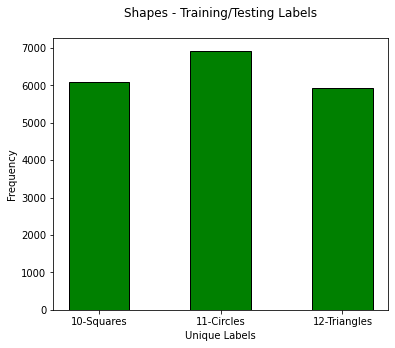

In [69]:
# training and testing data combined
uniqueValues, occurCount = np.unique(shapesLabels, return_counts=True)
shapesUniqueValues = uniqueValues
print('Training and Testing data data...')
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

fig = plt.figure(figsize = (6, 5)) 
plt.bar(range(len(uniqueValues)), occurCount, color ='green', width=0.5, edgecolor = 'black') 
plt.xlabel("Unique Labels") 
plt.ylabel("Frequency") 
plt.xticks(range(len(uniqueValues)),['10-Squares','11-Circles','12-Triangles']) 
plt.title("Shapes - Training/Testing Labels\n") 
plt.show() 

### plot some examples of data

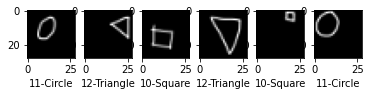

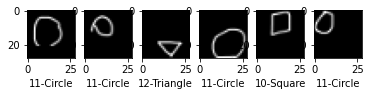

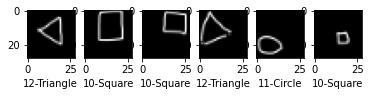

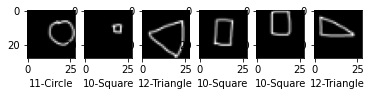

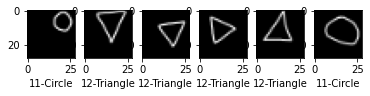

In [70]:
# print some of the data elements graphically to get a better visualization of what we have

numInRow = 6
numRows = 5

for rowIndx in range(numRows):
    for colIndx in range(numInRow):
        ax1 = plt.subplot(100 + numInRow*10 + colIndx + 1) 
        plt.xlabel(['10-Square','11-Circle','12-Triangle'][shapesLabels[rowIndx*numInRow + colIndx]-10])
        plt.imshow(np.array(shapesList[rowIndx*numInRow + colIndx], dtype='float').reshape((28, 28)), cmap='gray')    
    plt.show()

<br><br><br> 
# 4) LETTERS DATA

### NOTE: you may need to pip install extra-keras-datasets

In [71]:
# if the import below fails, run the following command at a terminal prompt
#    pip install extra-keras-datasets

# EMNIST-Letters contains 145.600 characters across 26 balanced classes (letters only).
# NOTE: this dataset contains upper and lower case letters
from extra_keras_datasets import emnist
(input_train, target_train), (input_test, target_test) = emnist.load_data(type='letters')

### what does the data look like

In [72]:
# shapes
print(input_train.shape)
print(target_train.shape)
print(input_test.shape)
print(target_test.shape)

# print some of the raw data elements in training images and labels where we can
#   see each pixel is a number between 0 (white) to 255 (black) with gray scale in-between 

# change this number to print more or less elements from the training dataset
numberOfTrainingElementsToPrint = 4

for trainingIndx in range(numberOfTrainingElementsToPrint):
    print('\n\ntraining image ' + str(trainingIndx) + ' is letter ' + str(['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'][target_train[trainingIndx]-1]))
    print(input_train[trainingIndx])

(124800, 28, 28)
(124800,)
(20800, 28, 28)
(20800,)


training image 0 is letter w
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   3   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  20 109 114  45   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 114 245 253 214   5   0   0   0   0   0  20 100  33   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 125 249 254 233  22   0   0   0   0  10 123 238 163  33   0   0   0   0   2   4   4   0   0   0   0]
 [  0   0   0  82 233 254 251  82   2   0   0   3  79 220 254 244 126   0   0   0   3  77 125 113   8   0   0   0]
 [  0   0   0  37 217 254 254 128   5   0   0  34 204 254 255 254 216   5   0  22 154 247 254 253 111   3   0   0]
 [  0   0   0  37 217 254 254 160  16   0   3  84 233 254 255 254 233  22  10  95 232 254 254 246  77   2   0   

### normalize data

In [73]:
# get min/max
traintestMax = np.maximum(input_train.max(),x_test.max())
traintestMin = np.minimum(input_train.min(),x_test.min())
print('minimum value = '+str(traintestMin))
print('maximum value = '+str(traintestMax))

minimum value = 0.0
maximum value = 255.0


In [74]:
# normalize input from 0-255 to 0.0-1.0. given the use of small weights in the model and the use of error between
#   predictions and expected values, the scale of inputs and outputs used to train the model are an important
#   factor. Unscaled input variables can result in a slow or unstable learning process
input_train, input_test = input_train / traintestMax, input_test / traintestMax

### setting letters labels to 13-38 (add offset of 12 to the letter label so we have distinct values for our numbers, shapes and letters)
### and how many of each letter do we have

Training data...
Unique Values :  [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
Occurrence Count :  [4800 4800 4800 4800 4800 4800 4800 4800 4800 4800 4800 4800 4800 4800 4800 4800 4800 4800 4800 4800 4800 4800 4800 4800 4800 4800]

Testing data...
Unique Values :  [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
Occurrence Count :  [800 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800]


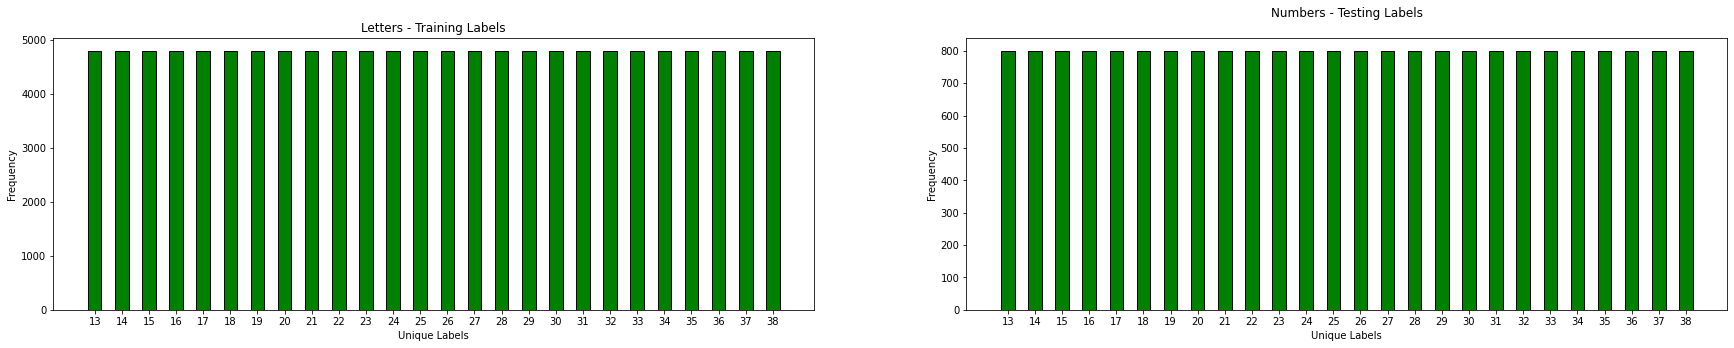

In [75]:
target_train_adj = target_train + 12
target_test_adj = target_test + 12

# training data
uniqueValues, occurCount = np.unique(target_train_adj, return_counts=True)
lettersUniqueValues = uniqueValues
print('Training data...')
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

fig = plt.figure(figsize = (30, 5)) 
plt.subplot(121)
plt.bar(range(len(uniqueValues)), occurCount, color ='green', width=0.5, edgecolor = 'black') 
plt.xlabel("Unique Labels") 
plt.ylabel("Frequency") 
plt.xticks(range(len(uniqueValues)),uniqueValues) 
plt.title("Letters - Training Labels") 

# testing data
print('\nTesting data...')
uniqueValues, occurCount = np.unique(target_test_adj, return_counts=True)
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

plt.subplot(122)
plt.bar(range(len(uniqueValues)), occurCount, color ='green',  width = 0.5, edgecolor ='black') 
plt.xlabel("Unique Labels") 
plt.ylabel("Frequency") 
plt.xticks(range(len(uniqueValues)),uniqueValues) 
plt.title("Numbers - Testing Labels\n") 
plt.show() 

### plot some examples of data

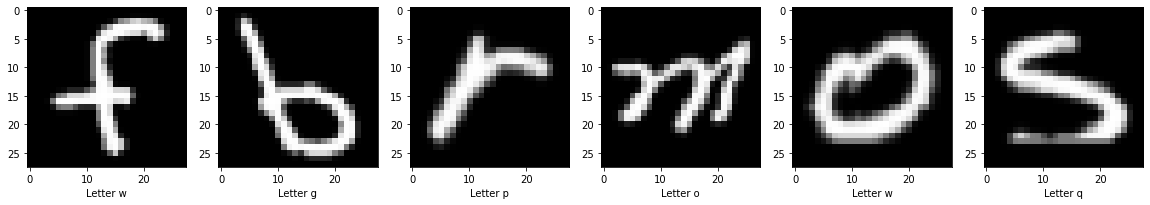

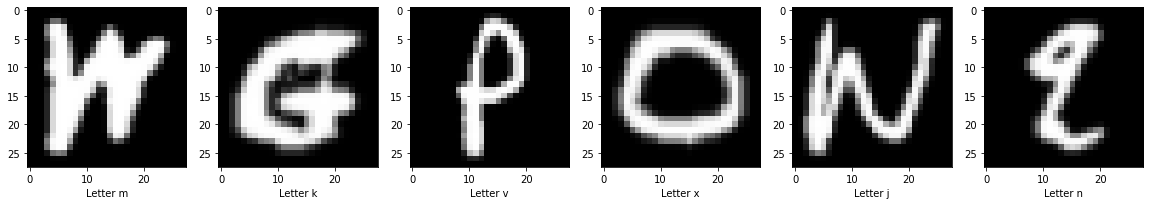

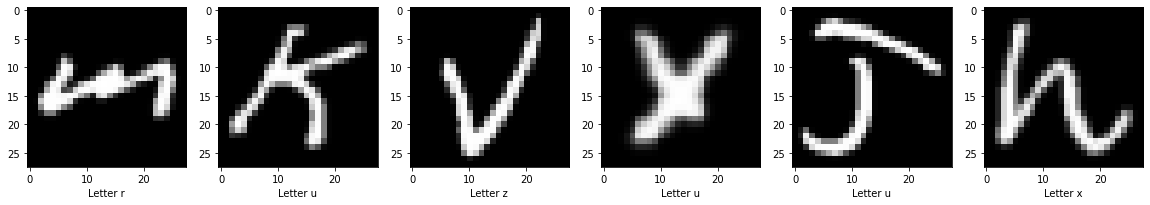

In [76]:
# print some of the data elements graphically to get a better visualization of what we have

import string
alpha = string.ascii_lowercase

# print some of the data elements graphically to get a better visualization of what we have

numInRow = 6
numRows = 3

figure = plt.figure
for rowIndx in range(numRows):
    figure(figsize=(20,60))
    for colIndx in range(numInRow):
        ax1 = plt.subplot(100 + numInRow*10 + colIndx + 1) 
        plt.xlabel('Letter '+ list(alpha)[target_train_adj[rowIndx*numInRow + colIndx]-13])
        plt.imshow(np.array(input_train[(rowIndx-1)*numInRow + colIndx], dtype='float').reshape((28, 28)), cmap='gray')    
    plt.show()

# 5) merge datasets

### we will split into train/test later

Unique Values :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
Occurrence Count :  [6903 7877 6990 7141 6824 6313 6876 7293 6825 6958 6084 6920 5920 5600 5600 5600 5600 5600 5600 5600 5600 5600 5600 5600 5600 5600 5600 5600 5600 5600 5600 5600 5600
 5600 5600 5600 5600 5600 5600]


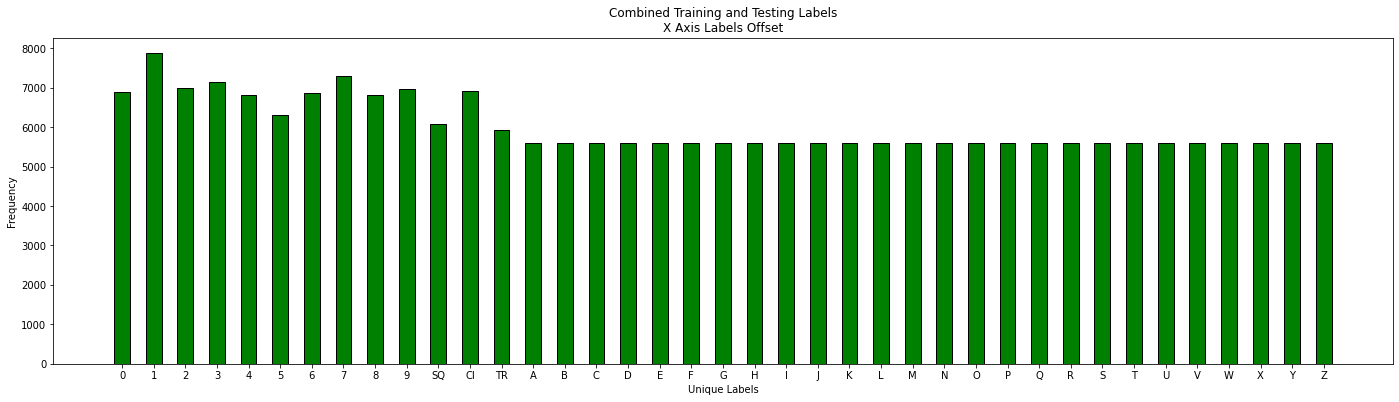

In [77]:
# merge training data/testing data and we will split later

# letters: input_train/input_test
# shapes:  shapesList
# numbers: x_train/x_test
#
# training labels/testing labels
# letters: target_train_adj/target_test_adj
# shapes:  shapesLabels
# numbers: y_train/y_test

# this should be 'derived' from the data but for now is just hard-coded.
x_axis_labels = ['0','1','2','3','4','5','6','7','8','9','SQ','CI','TR','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'] 

all_data_x = np.concatenate([input_train, input_test, shapesList, x_train, x_test])

all_data_y = np.concatenate([target_train_adj, target_test_adj, shapesLabels, y_train, y_test ])

# training/testing data
uniqueValues, occurCount = np.unique(all_data_y, return_counts=True)
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

figure, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(24,6))

plt.bar(range(len(uniqueValues)), occurCount, color ='green', width=0.5, edgecolor = 'black') 
plt.xlabel("Unique Labels") 
plt.ylabel("Frequency") 
# plt.xticks(range(len(uniqueValues)),uniqueValues) 
plt.xticks(range(len(uniqueValues)),x_axis_labels) 
plt.title("Combined Training and Testing Labels\nX Axis Labels Offset") 
plt.show()

### data transformation
### some examples of possible transformations of data using cv2 to apply blur, erosion, dilation, filter or rounding (dropping those values < 1.0). these are applied to a selected observations in the merged dataset identified by the list variable 'observationsToSelectedForTransformation'. sometimes, tranforming your data may improve results, however, you don't have to perform any transformation. there are packages to transform your images and this is just a quick example to show the results

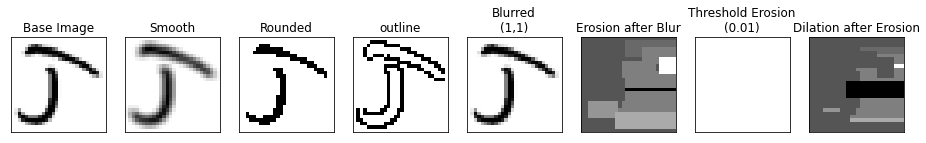

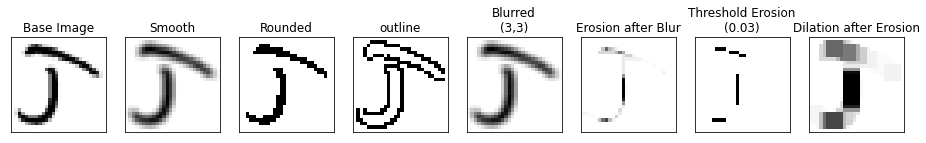

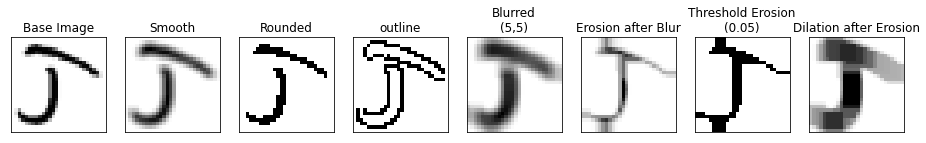

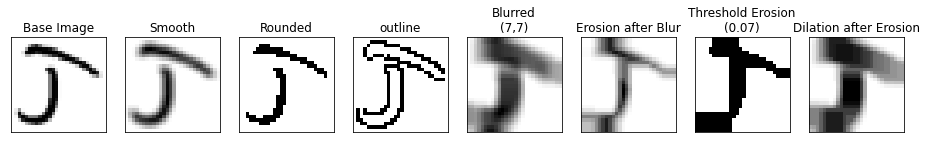

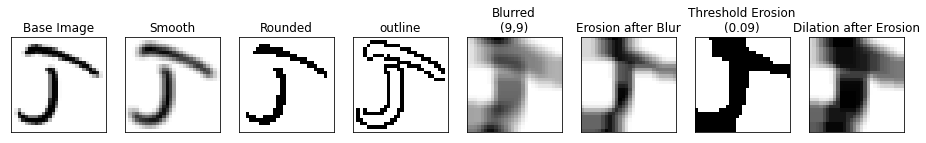

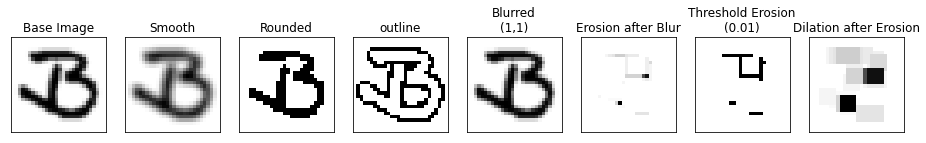

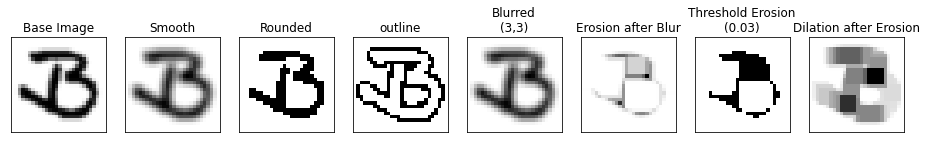

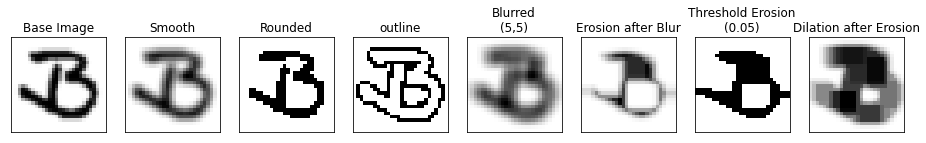

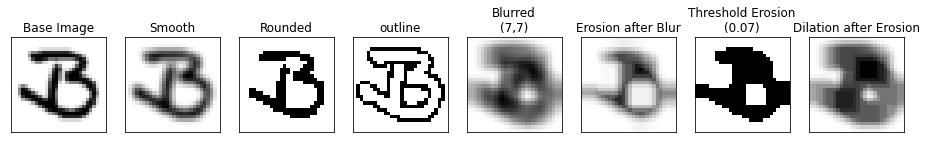

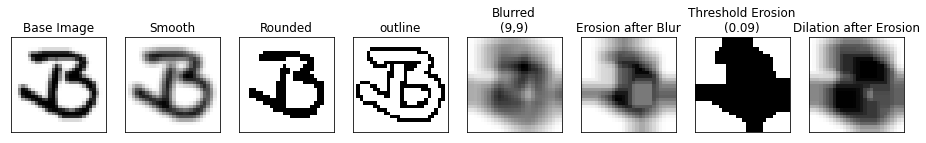

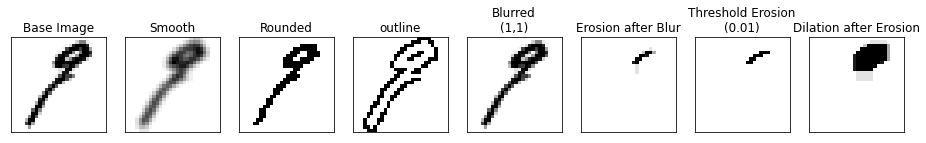

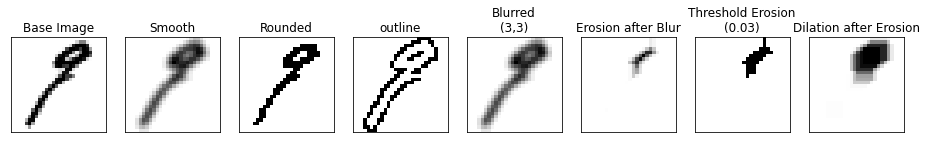

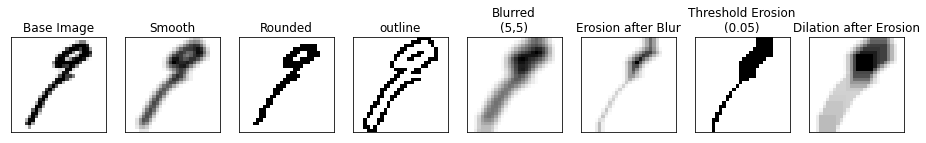

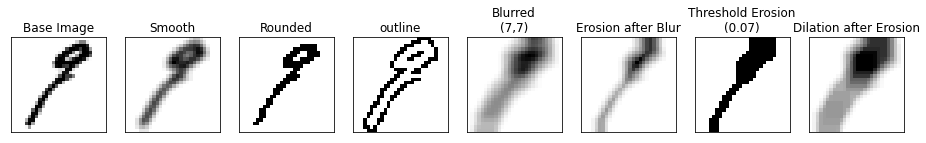

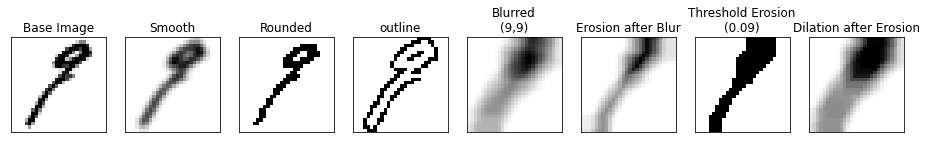

In [78]:
# if the import below fails, run the following command at a terminal prompt
#    pip install cv2

import cv2

observationsToSelectForTransformation = [10,20,30]

for obsNumber in range(len(observationsToSelectForTransformation)):
    img = all_data_x[observationsToSelectForTransformation[obsNumber],:,:]
    img_array = np.asarray(img)

    for indx in range(1,10,2):
    
        figure, ax1 = plt.subplots(nrows=1, ncols=8, figsize=(16,6))

        blur = cv2.blur(img,(indx,indx))

        kernel = np.ones((5,5),np.uint8)
        erosion = cv2.erode(blur,kernel,iterations = 1)
        
        thresholdErosion = np.where(erosion > (indx/100), 1, 0)
    
        dilation = cv2.dilate(erosion,kernel,iterations = 1)
            
        kernel = np.ones((3,3), np.float32) / 9.0
        smooth = cv2.filter2D(img, -1, kernel)

        imageRound = np.around(img)
        
        kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
        img_array = cv2.filter2D(img, -1, kernel)
        baseImage = cv2.resize(img_array, (28, 28 ))
        outline = np.where(baseImage < -1/2, 1, 0)
    
        # show results - note, base image, custom, rounded and outline are the same for all rows printed
        #                the blur varies across rows, where erosion and dilation are applied on the blurred image
        plt.subplot(181),plt.imshow(img,cmap=plt.get_cmap('gray_r')),plt.title('Base Image')
        plt.xticks([]), plt.yticks([])
        plt.subplot(182),plt.imshow(smooth,cmap=plt.get_cmap('gray_r')),plt.title('Smooth')
        plt.xticks([]), plt.yticks([])
        plt.subplot(183),plt.imshow(imageRound,cmap=plt.get_cmap('gray_r')),plt.title('Rounded')
        plt.xticks([]), plt.yticks([])
        plt.subplot(184),plt.imshow(outline,cmap=plt.get_cmap('gray_r')),plt.title('outline')
        plt.xticks([]), plt.yticks([])
        plt.subplot(185),plt.imshow(blur,cmap=plt.get_cmap('gray_r')),plt.title('Blurred\n('+str(indx)+','+str(indx)+')')
        plt.xticks([]), plt.yticks([])
        plt.subplot(186),plt.imshow(erosion,cmap=plt.get_cmap('gray_r')),plt.title('Erosion after Blur')
        plt.xticks([]), plt.yticks([])
        plt.subplot(187),plt.imshow(thresholdErosion,cmap=plt.get_cmap('gray_r')),plt.title('Threshold Erosion\n('+str(indx/100)+')')
        plt.xticks([]), plt.yticks([])
        plt.subplot(188),plt.imshow(dilation,cmap=plt.get_cmap('gray_r')),plt.title('Dilation after Erosion')
        plt.xticks([]), plt.yticks([])
        plt.show()

### what if we add a binary identifier to top of image?
### if you run either of these, make sure to set the variable 'addBinaryLabelToImage' and/or 'addBinaryClassToImage'  back to False, otherwise you are effectively labeling your data. this is shown as another data transformation where we are encoding data into an image. You do not want to use these on your actual runs, but may want to run these and view the results, especially in the layer visualizations
### two different binary 'tags' are added. The first, a 'binary' encoded representation of the label (0-38) placed in the top left 8 cells (0-7). A label of 14, the letter 'B', would be in binary '00001110'b, so the top 8 cells on the left would have values of 0.0 or 1.0 (as we normalized the data). The second is similar, however the binary encoding is the 'class', where 1 represents a number, 2 represents a shape, and 3 represents a letter. The second would be more representative of an example where you have some information on an image and want to use this information in a model you are developing. A business example might be where you have binned images based on geography or season

In [79]:
addBinaryLabelToImage = False
addBinaryClassToImage = False

# make sure only one selected as true
if (addBinaryLabelToImage):
    addBinaryClassToImage = False

# add binary of label to first row left of image
if addBinaryLabelToImage:
    for indx in range(all_data_x.shape[0]):
        bi = format(all_data_y[indx], '#010b')
        for indx2 in range(8):
            all_data_x[indx,0,indx2] = int(bi[(indx2+2):(indx2+3)])
    
    for indx in range(5):
        plt.imshow(np.array(all_data_x[indx], dtype='float').reshape((28, 28)), cmap='gray')    
        plt.show()
        
if addBinaryClassToImage:
    for indx in range(all_data_x.shape[0]):
        classIndx = 1
        if all_data_y[indx] > 9:
            classIndx = 2
            if all_data_y[indx] > 12:
                classIndx = 3
                
        bi = format(classIndx, '#010b')
        for indx2 in range(8):
            all_data_x[indx,0,indx2] = int(bi[(indx2+2):(indx2+3)])
    
    for indx in range(5):
        plt.imshow(np.array(all_data_x[indx], dtype='float').reshape((28, 28)), cmap='gray')    
        plt.show()        

### now split into training and testing datasets

In [80]:
from sklearn.model_selection import train_test_split

percentToTest = 0.20
x_train, x_test, y_train, y_test = train_test_split(all_data_x, all_data_y, test_size=percentToTest, random_state=42)

print(x_train.shape)
y_train = np.array(y_train)
print(x_test.shape)
y_test = np.array(y_test)

(187619, 28, 28)
(46905, 28, 28)


### print an observation of each of our training element types

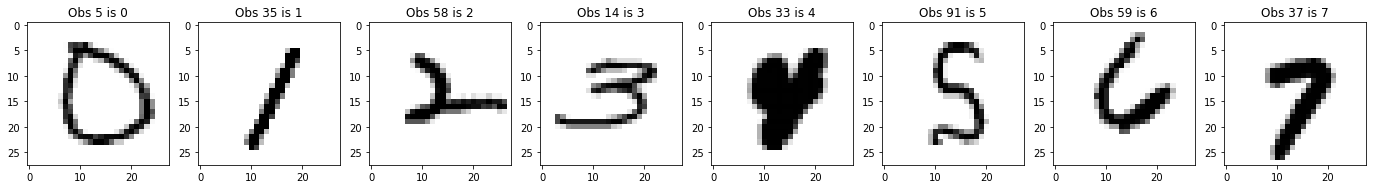

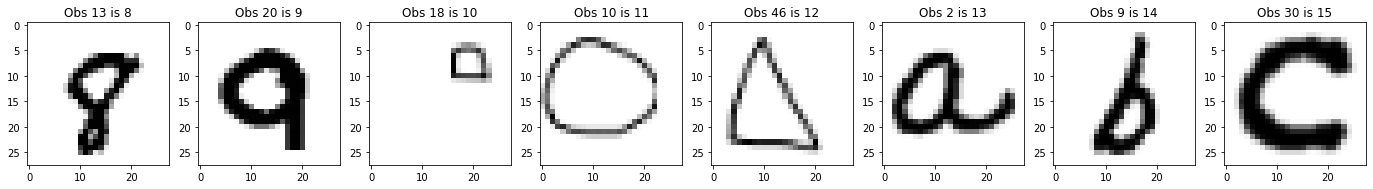

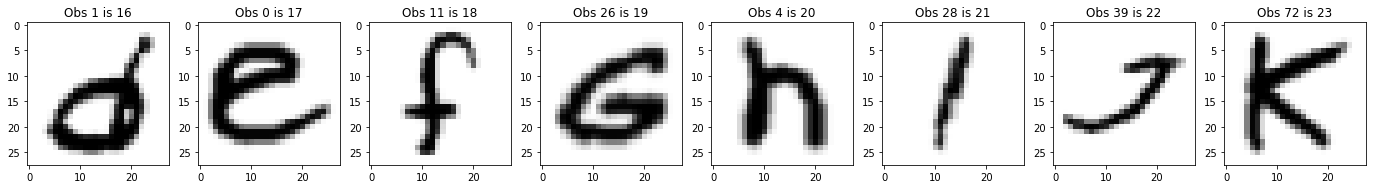

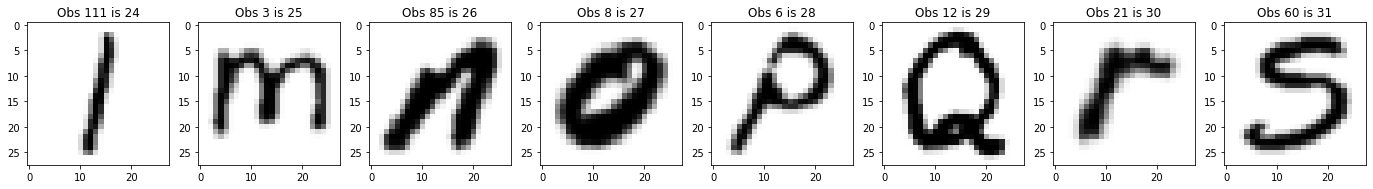

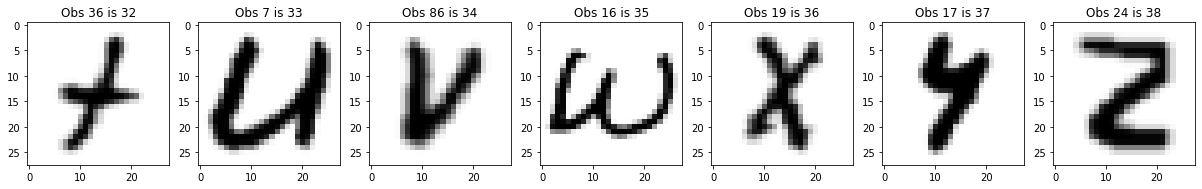

In [81]:
# this should be 'derived' from the data but for now is just hard-coded.
labels = ['0','1','2','3','4','5','6','7','8','9','SQ','CI','TR','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'] 

numInRow = 8
if (numInRow < 0 or numInRow > 8):
    numInRow = 8

fig, axes = plt.subplots(nrows=1, ncols=numInRow, figsize=(24,6))
        
for indx in range(len(labels)):
    position = np.argmax(y_train == indx)
    subplotID = 100 + numInRow * 10 + indx % numInRow + 1
    plt.subplot(subplotID),plt.imshow(x_train[position,:,:],cmap = 'gray_r'),plt.title('Obs '+str(position)+' is '+str(y_train[position]))
    if numInRow - indx % numInRow == 1:
        fig, axes = plt.subplots(nrows=1, ncols=numInRow, figsize=(24,6))

# blank out blank plots (probably a better way to do this)
for indx in range(indx % numInRow):
    axes.flat[-(indx+1)].set_visible(False)

# 6) create model
### below, you are provided a 'base' model, 'MODEL_1'. this model will run and provide results with an accuracy of ~ 66%, thus, most likely there are opportunities for improvement. One suggestion is to then create a 'modelToRun = 2' where you define a new model, possibly utilizing the base model. you can then use the variable 'modelToRun' to select which of your models you want to run, and go back and forth between models and compare results as you add new models or update existing models. it is probably a good idea to have all the specifications for each model, including the loss function and compile, self contained within the associated if statement, even if there is code constant across all your model definitions

In [82]:
# clear any previous sessions
tf.keras.backend.clear_session()

# we may have multiple models defined below...so we need to select one to run
modelToRun = 1
# this is the number of output classes, which is 10 (numbers) + 3 (shapes) + letters (26)
#   however, we will calculate the number of classes based on output values as a double-check
numberOfClasses = len(np.unique(y_train))

if modelToRun == 1:
    modelName = 'MODEL_1'
    print('creating ' + modelName)
    model = tf.keras.Sequential(
              [tf.keras.layers.Reshape(input_shape=(28,28), target_shape=(28, 28, 1),name='Reshape'),
               tf.keras.layers.Conv2D(kernel_size=2, filters=2, activation='relu', padding='same', strides=4, name='Conv2D-1'),
               tf.keras.layers.Flatten(name='Flatten'),
               tf.keras.layers.Dense(numberOfClasses, activation='softmax',name='Dense')
              ],name=modelName)

    # set loss function
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
    # compile model
    model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

if modelToRun == 2:
    # placeholder for another model
    modelName = 'MODEL_2'
    print('creating ' + modelName)
    
if modelToRun == 3:
    # placeholder for another model
    modelName = 'MODEL_3'
    print('creating ' + modelName)

# continue if statements for additional models

# print model layers
numLayers = len(model.layers)
print('\n'+str(numLayers)+' '+'layers in model:')
for layerIndx in range(len(model.layers)):
    print('    '+str(layerIndx+1)+' '+model.layers[layerIndx].name)

creating MODEL_1

4 layers in model:
    1 Reshape
    2 Conv2D-1
    3 Flatten
    4 Dense


### train model

In [83]:
print('running model ' + model.name + '...')
numEpochs = 20
batchSize = 50
validationSplit = 0.33

start = time.time()

history = model.fit(x_train, y_train, batch_size=batchSize, epochs=numEpochs, validation_split=validationSplit)

done = time.time()
elapsed = round(done - start)

running model MODEL_1...
Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2514/2515 [============================>.] - ETA: 0s - loss: 1.7981 - accuracy: 0.5014WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fac72b24ae8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2515/2515 [==============================] - 6s 2ms/step - loss: 1.7980 - accuracy: 0.5014 - val_loss: 1.37

In [84]:
# !kill 3198

# %reload_ext tensorboard
# %tensorboard --logdir logs

# tensorboard --logdir=data/ --host localhost --port 8088

### plot model accuracy and loss for training and validation

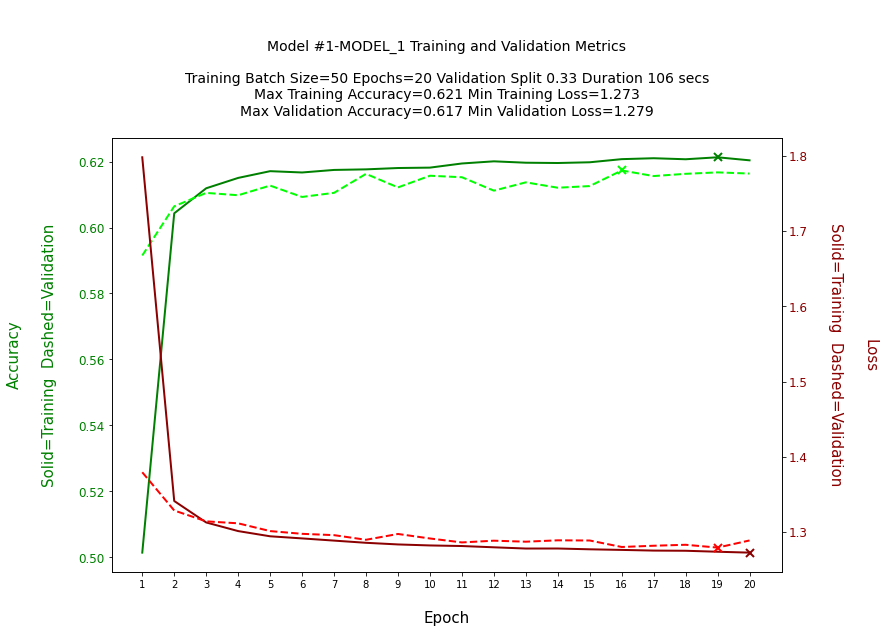

In [85]:
# note: if loss curve starts to reverse direction we could be overfitting model

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
# get max values for annotation
ind_xta = np.argmax(history.history['accuracy'])
ind_xva = np.argmax(history.history['val_accuracy'])
ind_xtl = np.argmin(history.history['loss'])
ind_xvl = np.argmin(history.history['val_loss'])
plt.title('\n\nModel #'+str(modelToRun)+'-'+model.name+' Training and Validation Metrics'+
          '\n\nTraining Batch Size='+str(batchSize)+' '+
          'Epochs='+str(numEpochs)+ ' '+
          'Validation Split '+str(validationSplit)+' '+
          'Duration '+str(elapsed)+' secs\n'+
          'Max Training Accuracy='+str("%.3f" % history.history['accuracy'][ind_xta])+' ' +
          'Min Training Loss='+str("%.3f" % history.history['loss'][ind_xtl])+'\n'+
          'Max Validation Accuracy='+str("%.3f" % history.history['val_accuracy'][ind_xva])+' ' +
          'Min Validation Loss='+str("%.3f" % history.history['val_loss'][ind_xvl])+'\n',size=14)
ax1.plot(history.history['accuracy'], color='green', linestyle='-',linewidth=2)
plt.plot(history.history['val_accuracy'], color='lime', linestyle='--',linewidth=2)

ax1.set_xlabel('\nEpoch', size=15)
ax1.set_ylabel('Accuracy\n\nSolid=Training  Dashed=Validation\n', color='green',size=15)
ax1.set_xlim(right=numEpochs)
plt.xticks(np.arange(len(history.history['accuracy'])), np.arange(1, len(history.history['accuracy'])+1))

plt.plot(ind_xta, history.history['accuracy'][ind_xta], 'gx', color='green', markersize=8, markeredgewidth=2)
plt.plot(ind_xva, history.history['val_accuracy'][ind_xva], 'gx', color='lime', markersize=8, markeredgewidth=2)

for tl in ax1.get_yticklabels():
    tl.set_color('green')
    tl.set_fontsize(12)
    
ax2 = ax1.twinx()
ax2.plot(history.history['loss'], color='darkred', linestyle='-',linewidth=2)
plt.plot(history.history['val_loss'], color='red', linestyle='--',linewidth=2)

ax2.set_ylabel('Loss\n\nSolid=Training  Dashed=Validation\n', color='darkred',size=15, rotation=270, labelpad=70)
plt.plot(ind_xtl, history.history['loss'][ind_xtl], 'rx', color='darkred', markersize=8, markeredgewidth=2)
plt.plot(ind_xvl, history.history['val_loss'][ind_xvl], 'rx', color='red', markersize=8, markeredgewidth=2)

for tl in ax2.get_yticklabels():
    tl.set_color('darkred')
    tl.set_fontsize(12)

### quick look at what is the accuracy on the testing data compared to training
### more detailed testing metrics are below in '7) test model'

In [86]:
print("Training data  : Accuracy {}, Loss {}\n".format(history.history['accuracy'][ind_xta], history.history['loss'][ind_xtl]))
print("Validation data: Accuracy {}, Loss {}\n".format(history.history['val_accuracy'][ind_xva], history.history['val_loss'][ind_xvl]))

# evaluate test
loss, accuracy = model.evaluate(x_test,  y_test, verbose=1)
print("Testing data   : accuracy {}, Loss {}".format(accuracy, loss))

Training data  : Accuracy 0.6212928785082416, Loss 1.272725572813963

Validation data: Accuracy 0.6172979084228377, Loss 1.279420604885255

1466/1466 [==============================] - 1s 972us/step - loss: 1.2715 - accuracy: 0.6236
Testing data   : accuracy 0.6235795757381942, Loss 1.2714785345301371


### review model summary

In [87]:
print(model.summary())

Model: "MODEL_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
Conv2D-1 (Conv2D)            (None, 7, 7, 2)           10        
_________________________________________________________________
Flatten (Flatten)            (None, 98)                0         
_________________________________________________________________
Dense (Dense)                (None, 39)                3861      
Total params: 3,871
Trainable params: 3,871
Non-trainable params: 0
_________________________________________________________________
None


# 7) keract visualizations
### keract provides us the ability to visualize layers in the model. vary the observations you select and use these visualizations to provide understanding of how the images are being processed, seeing what is important to the model, and identifying and validating possible changes to your model specification. to read about what keract is doing, start here https://pypi.org/project/keract/
### note: you have an option to just print the activations and heatmaps from keract or you can optionally save them by setting the variable 'saveActivationsAndHeatmaps' to True. the ones printed are the ones listed in the list 'itemsToPrint'. if 'saveActivationsAndHeatmaps' = True, the subsequent visualizations are then stored in either an 'activations' or 'heatmaps' folder under the current working directory. You can then optionally print them in the next cell below. depending on your process and whether you save activations and heatmaps, you may want to optionally add another level into the folder structure, as currently, contents in the folder structure below will be overwritten and no steps are implemented in the code to clear out existing activations and heatmaps from previous runs

In [88]:
# if the import below fails, run the following command at a terminal prompt
#    pip install keract

from keract import get_activations, display_activations, display_heatmaps
from pathlib import Path

# the code below is looking for the final layer by name (layer='Dense') so make sure you named your 
#   last layer 'Dense' in the model and you ran the command 'tf.keras.backend.clear_session()' before
#   model creation

# get the last layer name so we can reference it in the keract code below
layer_names = [layer.name for layer in model.layers]
lastLayerName = layer_names[len(layer_names) - 1]

# which items in the test data do we want to print
itemsToPrint = [0,1,2]

# this should be 'derived' from the data but for now is just hard-coded.
y_axis_labels = ['0','1','2','3','4','5','6','7','8','9','SQ','CI','TR','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'] 

# save or display activations and heatmaps
#   if saved then these by layer are written to an 'activations' or 'heatmaps'
#   folder under the current working directory
saveActivationsAndHeatmaps = True

os.chdir('/home/jovyan/Northwestern/MSDS458/Spring2020/CNN_Shapes')
curwd = os.getcwd()

for indx in itemsToPrint:
    print('====================================================================================================')
    print('Processing shape ' + str(indx))
    print('====================================================================================================')
    print('Observed : '+ y_axis_labels[y_test[indx]])
    keract_inputs = x_test[indx:indx+1]
    keract_targets = y_test[indx:indx+1]
    activations = get_activations(model, keract_inputs)
    predictedValue = np.argmax(activations[lastLayerName])
    # get predicted value
    print('\n\nPredicted: ' + y_axis_labels[predictedValue])
    
    if (saveActivationsAndHeatmaps):
        os.chdir(curwd)
        print('saving activations to ' + curwd + '/activations/shape_' + str(indx))
        print(curwd)
        Path(curwd + '/activations/shape_' + str(indx)).mkdir(parents=True, exist_ok=True)
        os.chdir(curwd + '/activations/shape_' + str(indx)) 
        display_activations(activations, cmap="gray", save=saveActivationsAndHeatmaps)
        
        os.chdir(curwd)
        print('saving heatmaps to ' + curwd + '/heatmaps/shape_' + str(indx))
        print(curwd)
        Path(curwd + '/heatmaps/shape_' + str(indx)).mkdir(parents=True, exist_ok=True)
        os.chdir(curwd + '/heatmaps/shape_' + str(indx)) 
        display_heatmaps(activations, keract_inputs.reshape(28,28), save=saveActivationsAndHeatmaps)
        
    print('completed\n\n\n')

os.chdir(curwd)

Processing shape 0
Observed : 6


Predicted: 6
saving activations to /home/jovyan/Northwestern/MSDS458/Spring2020/CNN_Shapes/activations/shape_0
/home/jovyan/Northwestern/MSDS458/Spring2020/CNN_Shapes
Reshape_input (1, 28, 28) 
Reshape (1, 28, 28, 1) 
Conv2D-1 (1, 7, 7, 2) 
Flatten (1, 98) 
Dense (1, 39) 
saving heatmaps to /home/jovyan/Northwestern/MSDS458/Spring2020/CNN_Shapes/heatmaps/shape_0
/home/jovyan/Northwestern/MSDS458/Spring2020/CNN_Shapes
Reshape_input (1, 28, 28) 
Reshape (1, 28, 28, 1) 
Conv2D-1 (1, 7, 7, 2) 
Flatten (1, 98) -> Skipped. 2D Activations.
Dense (1, 39) -> Skipped. 2D Activations.
completed



Processing shape 1
Observed : 6


Predicted: 6
saving activations to /home/jovyan/Northwestern/MSDS458/Spring2020/CNN_Shapes/activations/shape_1
/home/jovyan/Northwestern/MSDS458/Spring2020/CNN_Shapes
Reshape_input (1, 28, 28) 
Reshape (1, 28, 28, 1) 
Conv2D-1 (1, 7, 7, 2) 
Flatten (1, 98) 
Dense (1, 39) 
saving heatmaps to /home/jovyan/Northwestern/MSDS458/Spring2020/C

### if we saved activations and/or heatmaps, we can display them here by setting the variable 'printActivationsAndHeatmaps' = True
### note: based on your model you may want to adjust the printHeight and printWidth below OR print these without using the save option in keract

Processing shape 0
activations: 0_Reshape_input.png


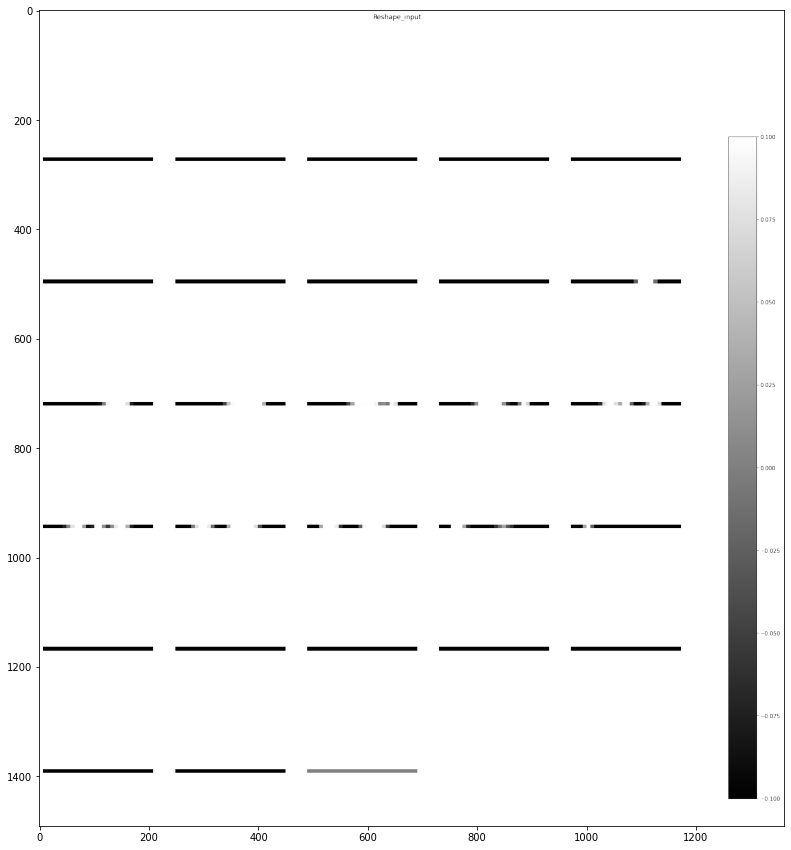

activations: 1_Reshape.png


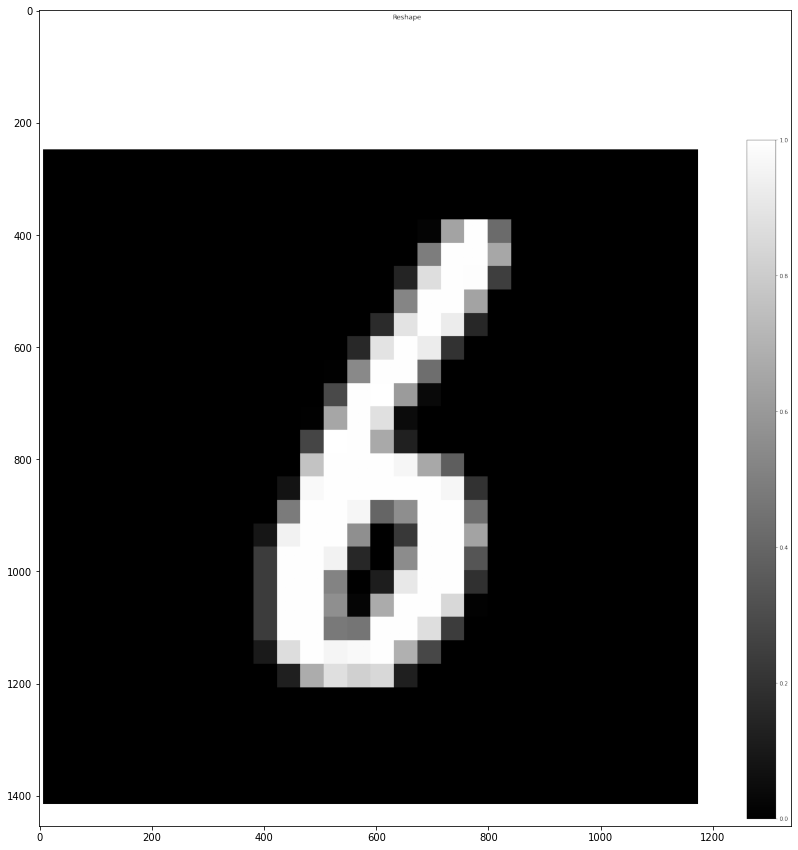

activations: 2_Conv2D-1.png


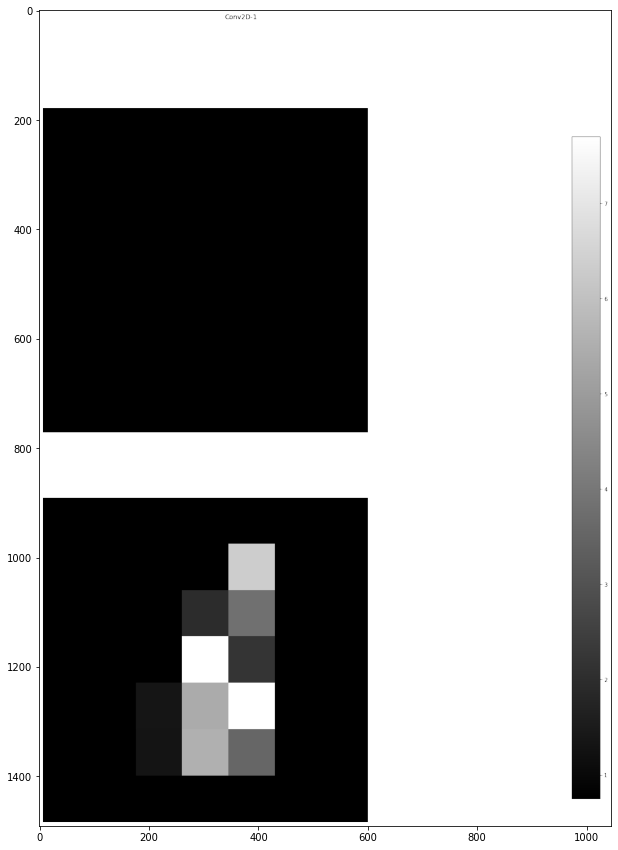

activations: 3_Flatten.png


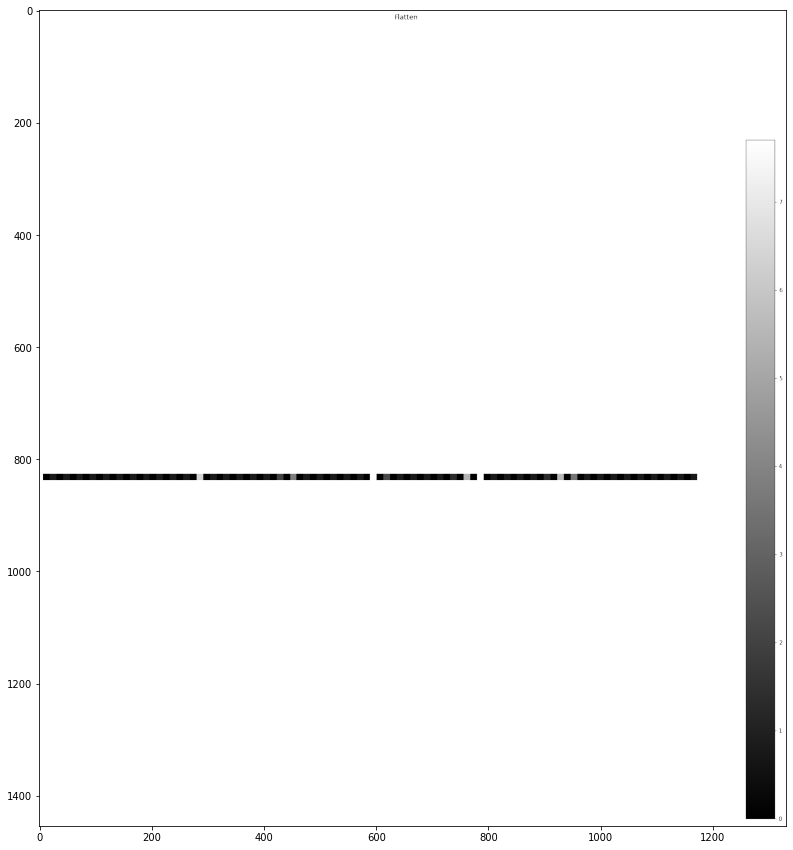

activations: 4_Dense.png


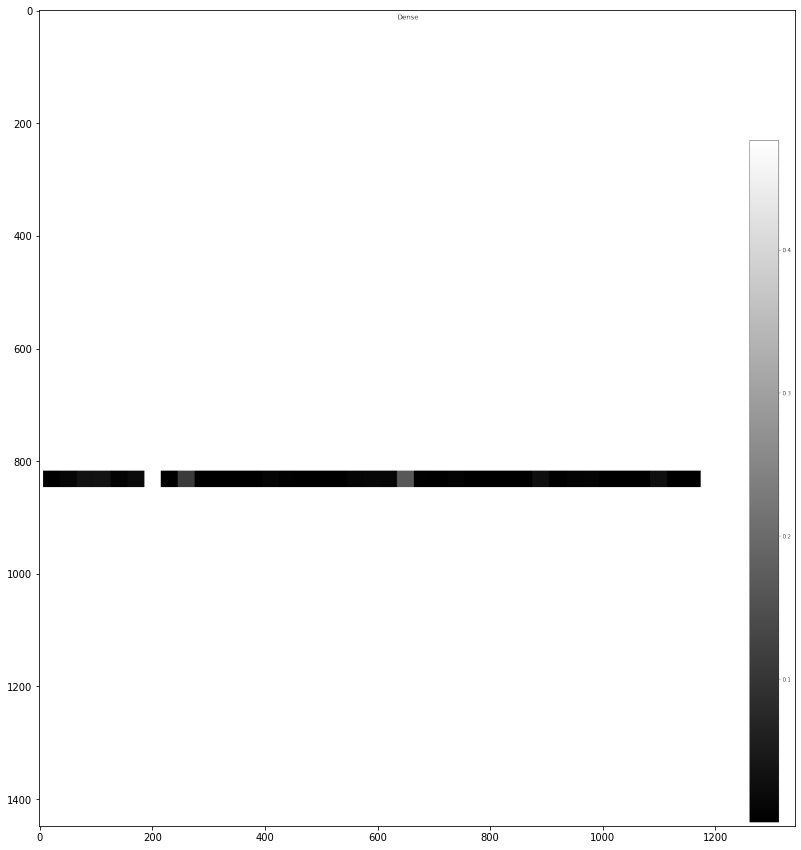

heatmaps: 0_Reshape_input.png


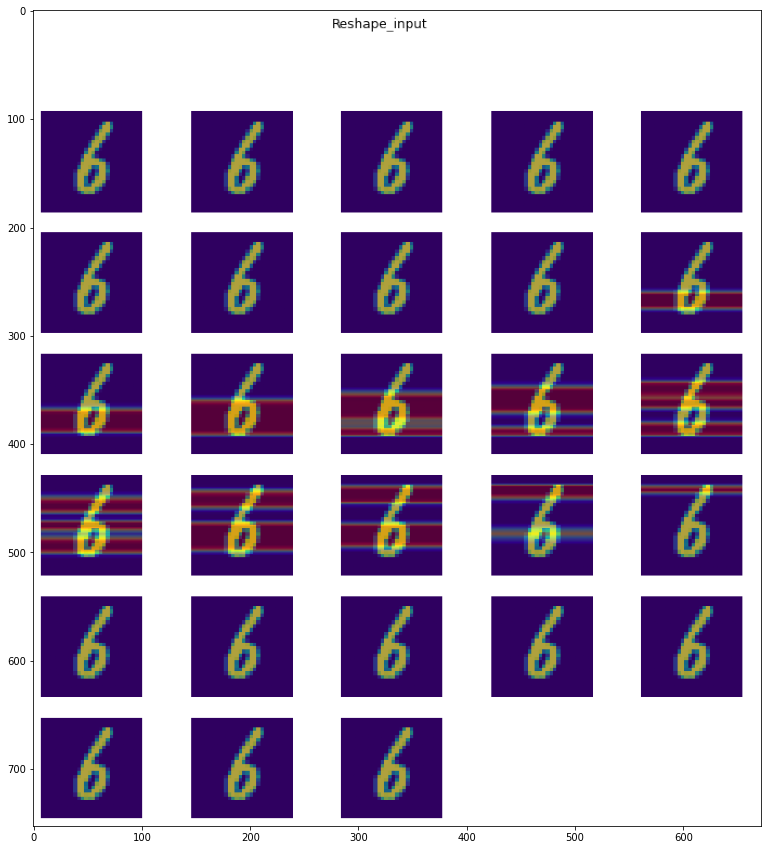

heatmaps: 1_Reshape.png


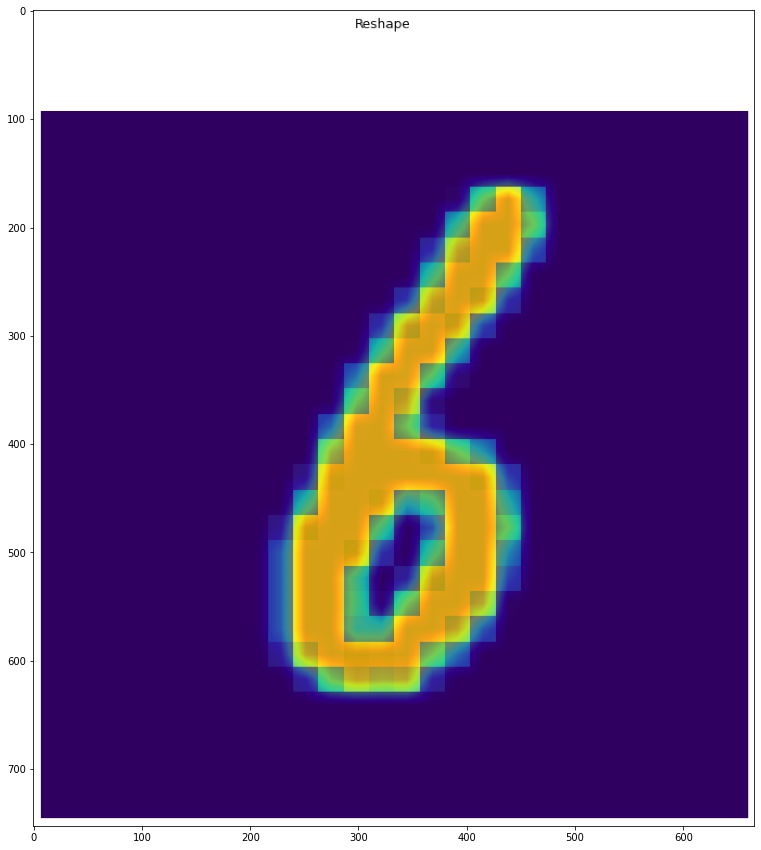

heatmaps: 2_Conv2D-1.png


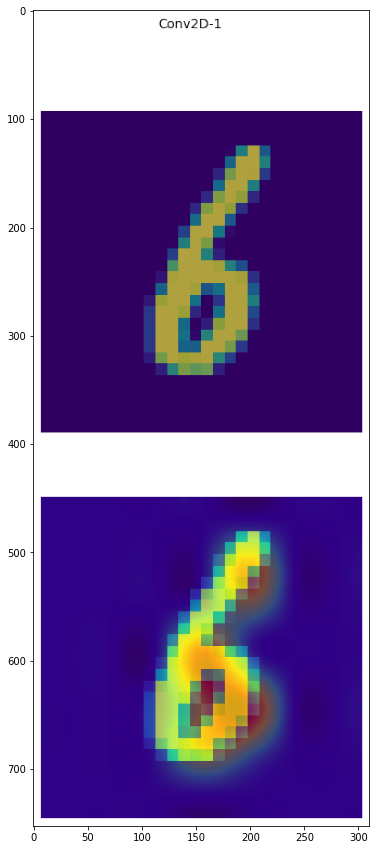

Processing shape 1
activations: 0_Reshape_input.png


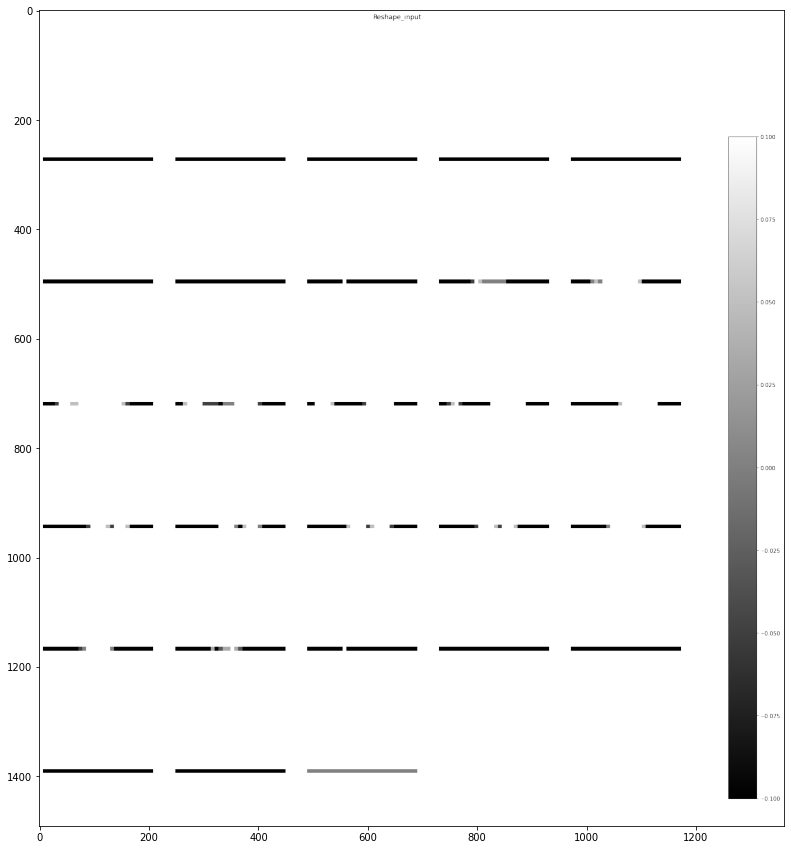

activations: 1_Reshape.png


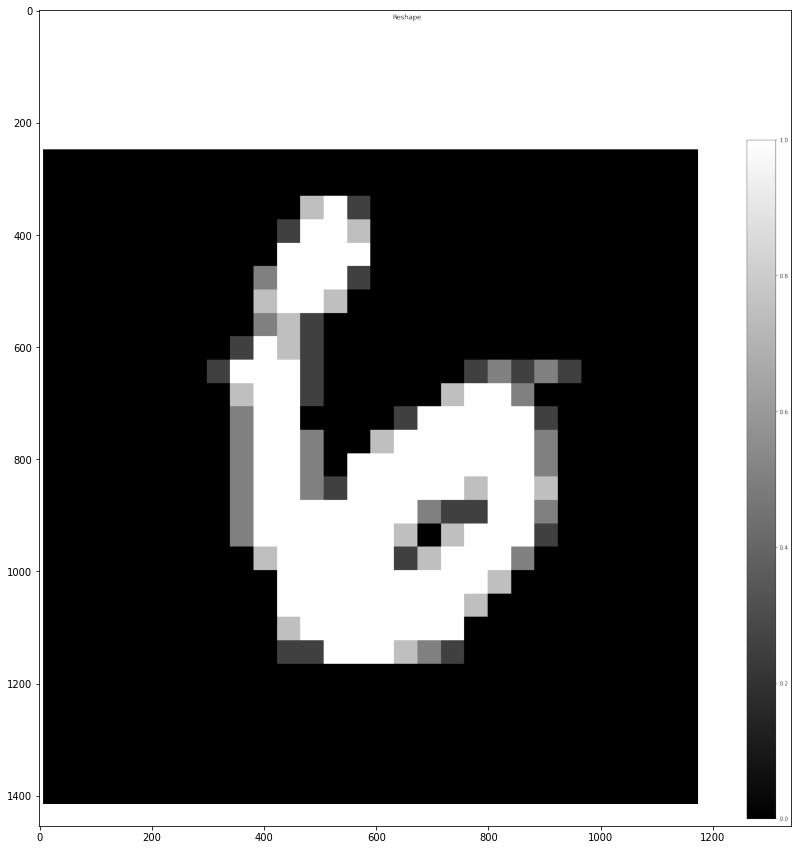

activations: 2_Conv2D-1.png


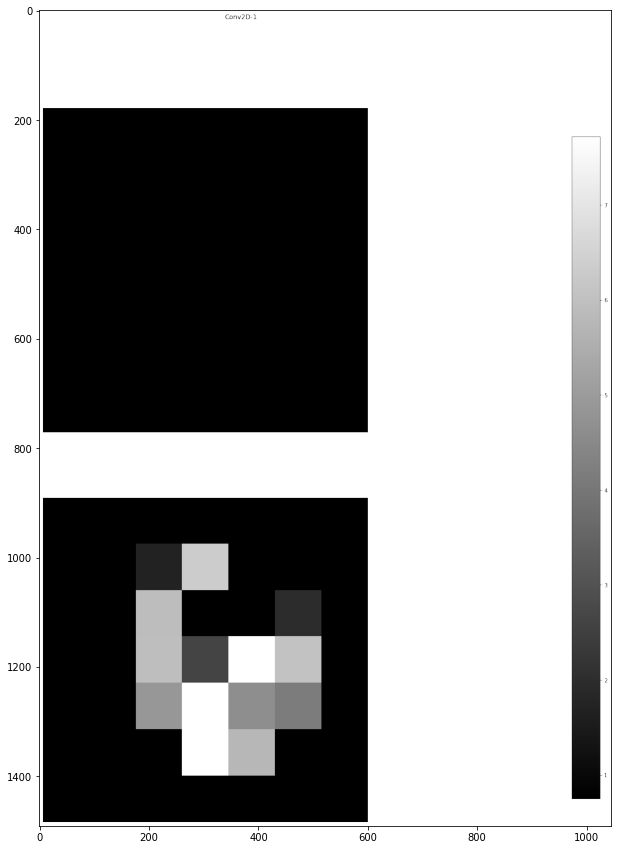

activations: 3_Flatten.png


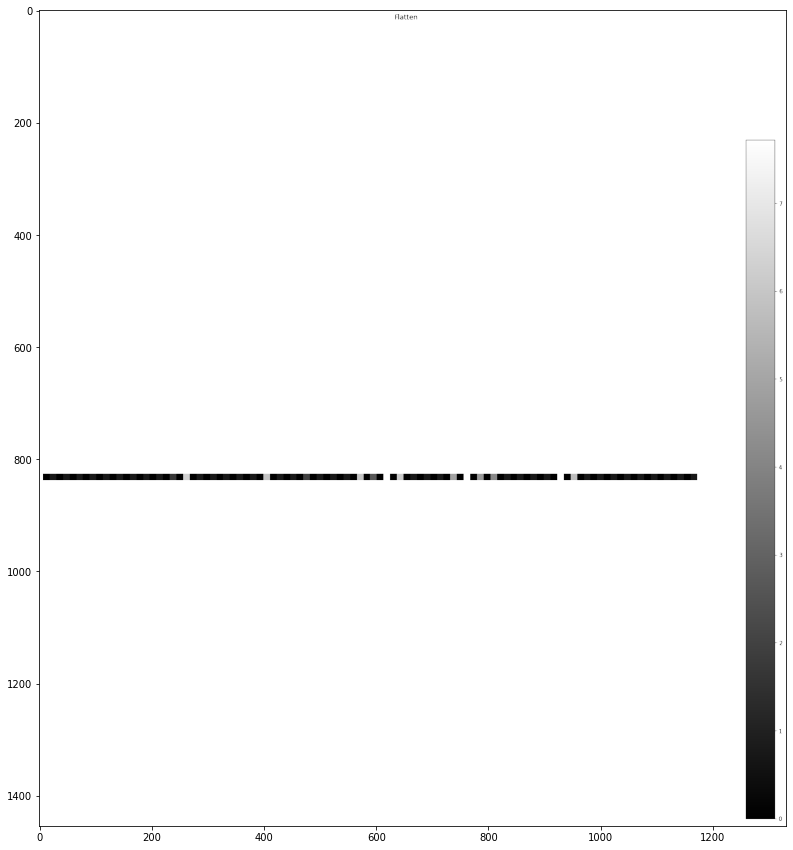

activations: 4_Dense.png


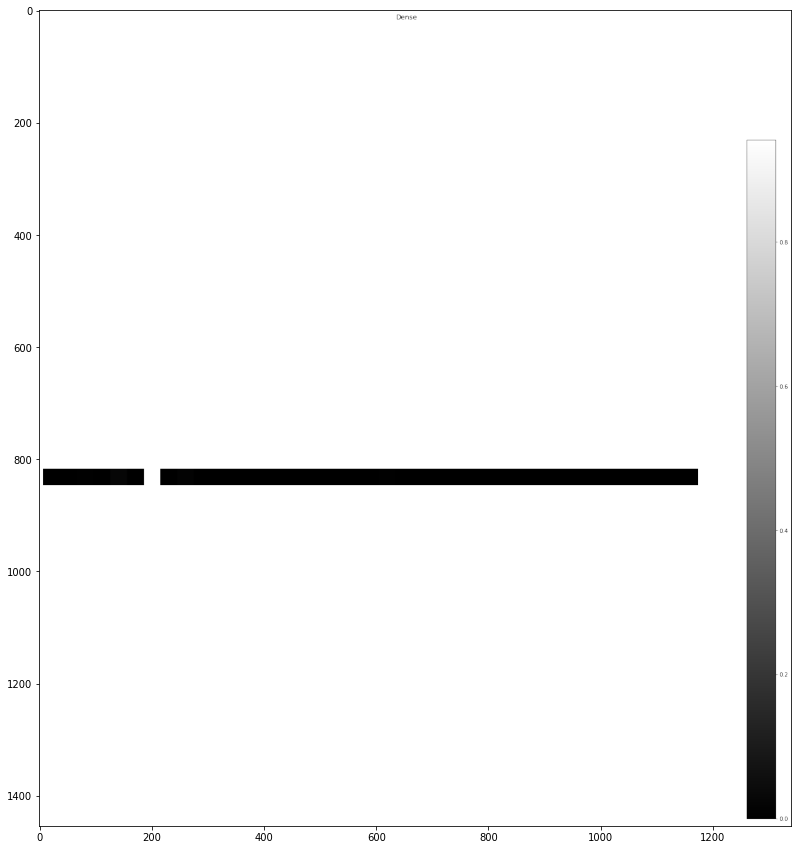

heatmaps: 0_Reshape_input.png


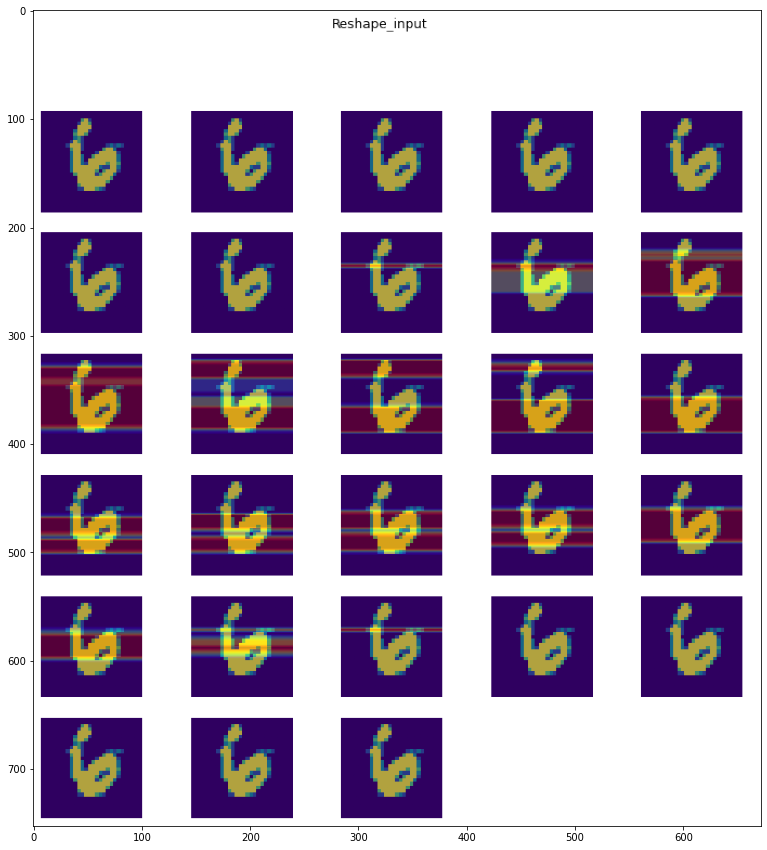

heatmaps: 1_Reshape.png


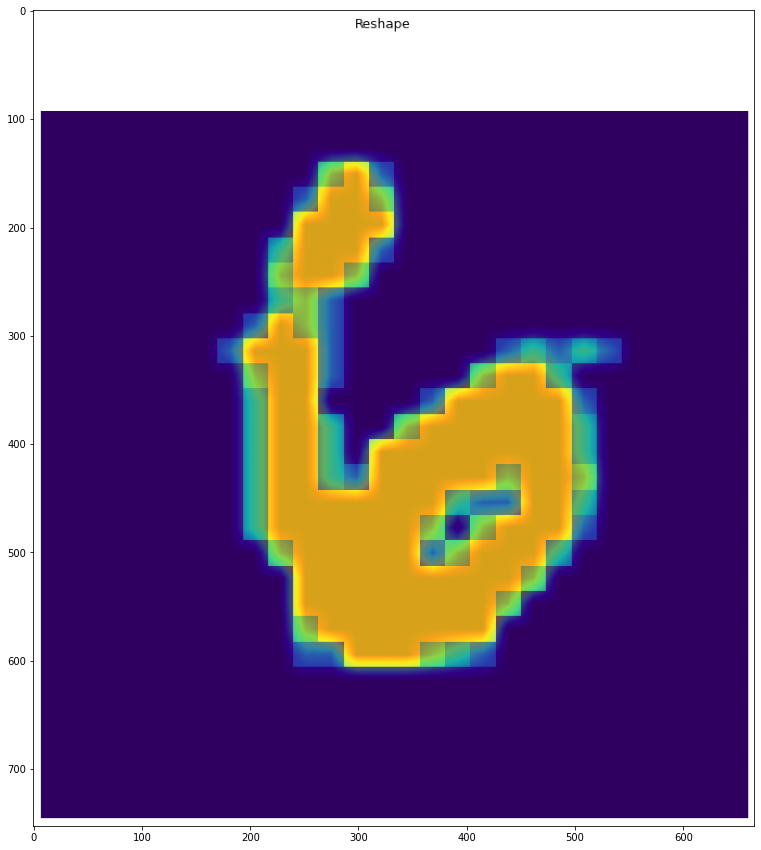

heatmaps: 2_Conv2D-1.png


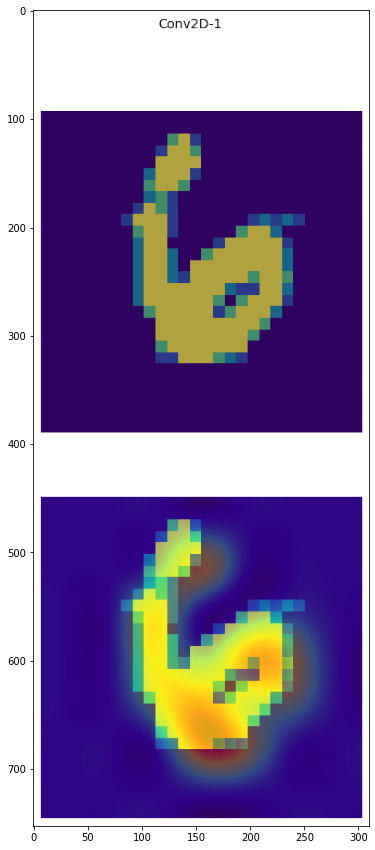

Processing shape 2
activations: 0_Reshape_input.png


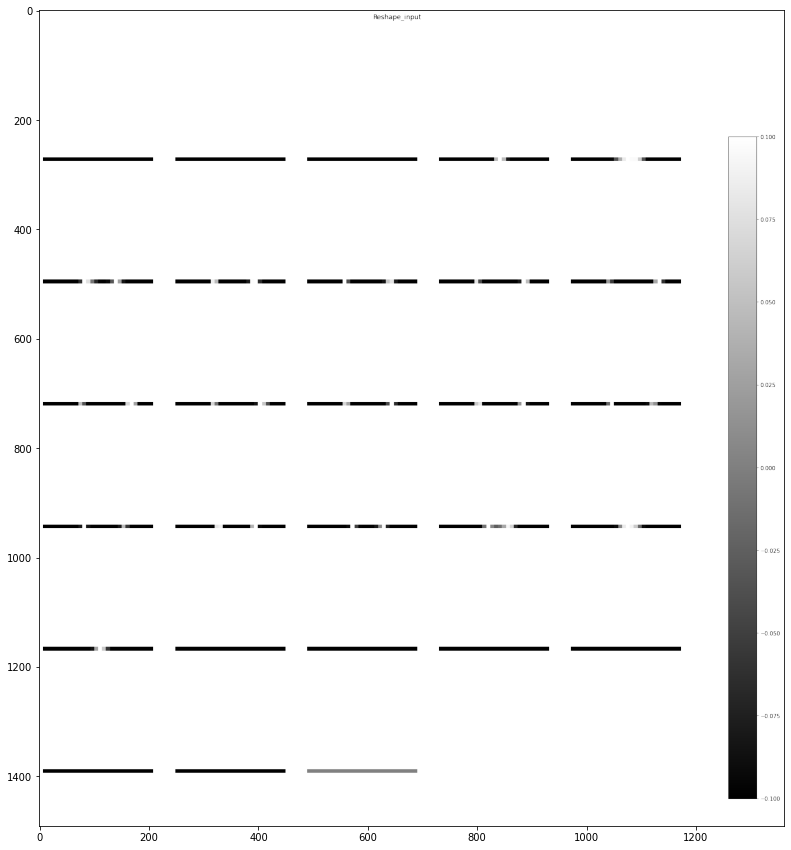

activations: 1_Reshape.png


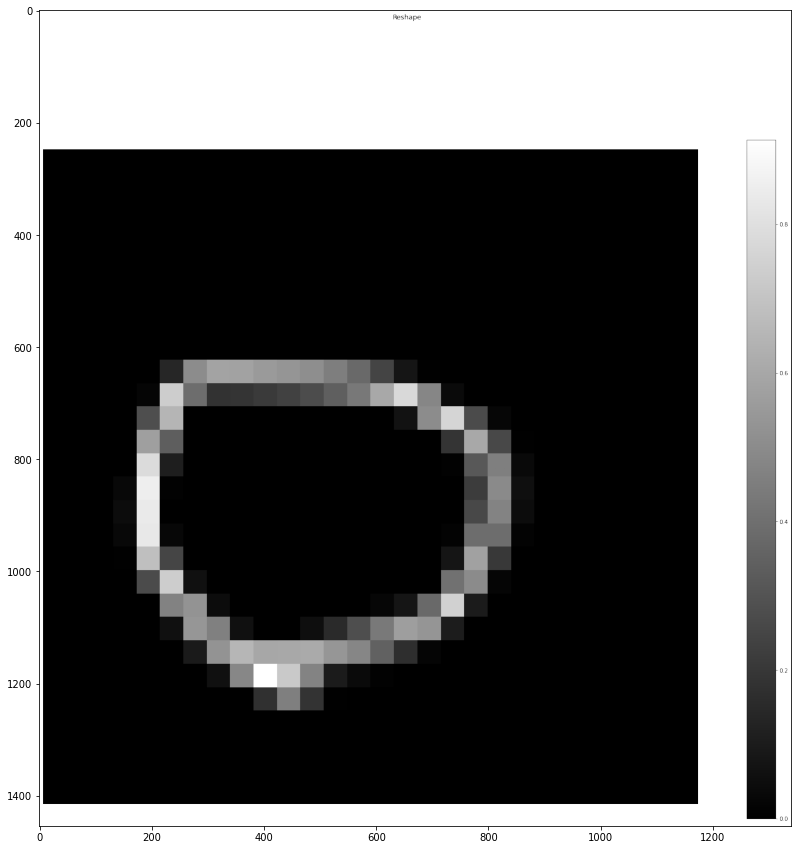

activations: 2_Conv2D-1.png


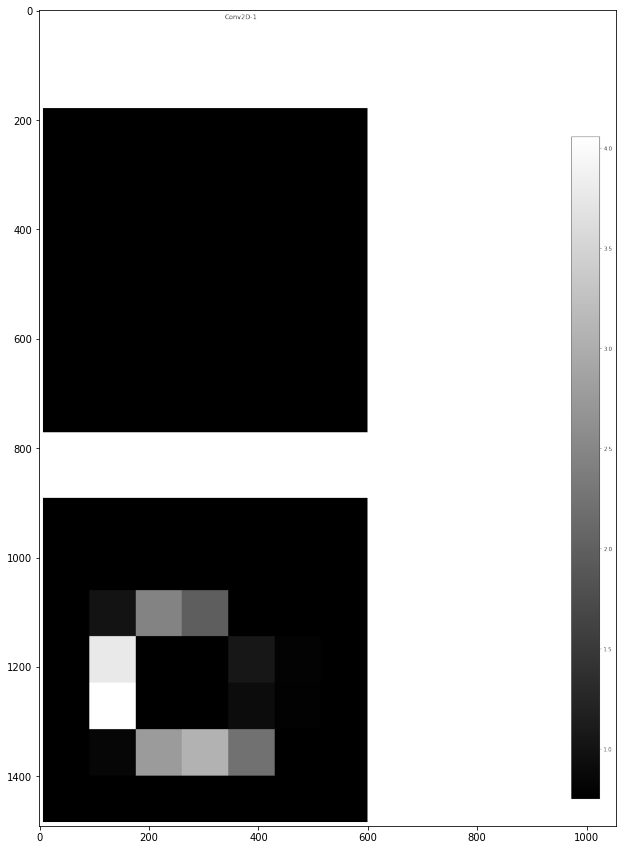

activations: 3_Flatten.png


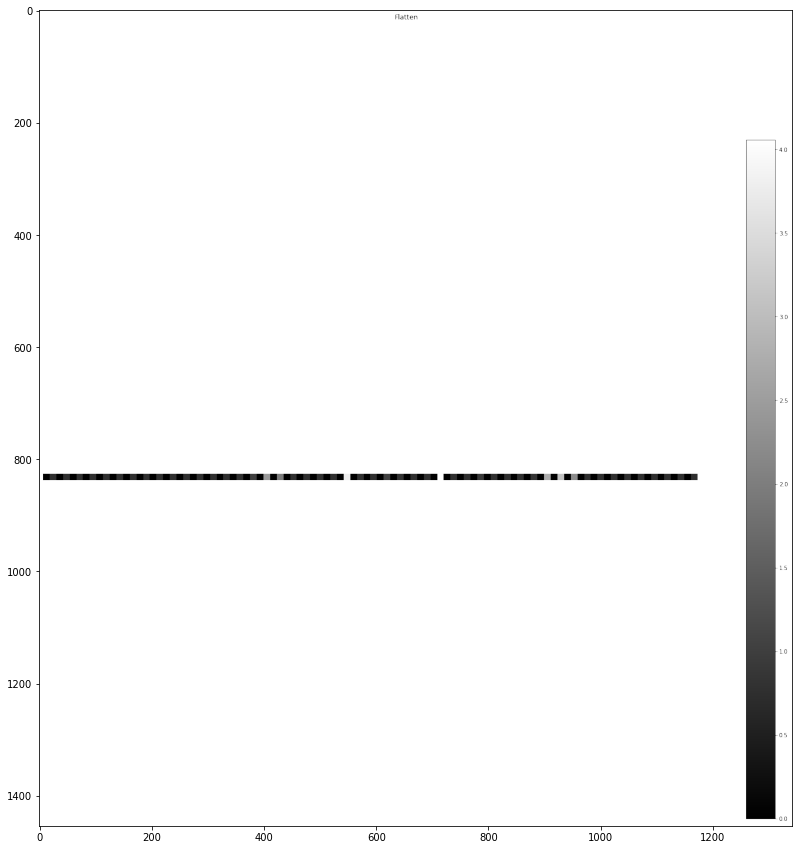

activations: 4_Dense.png


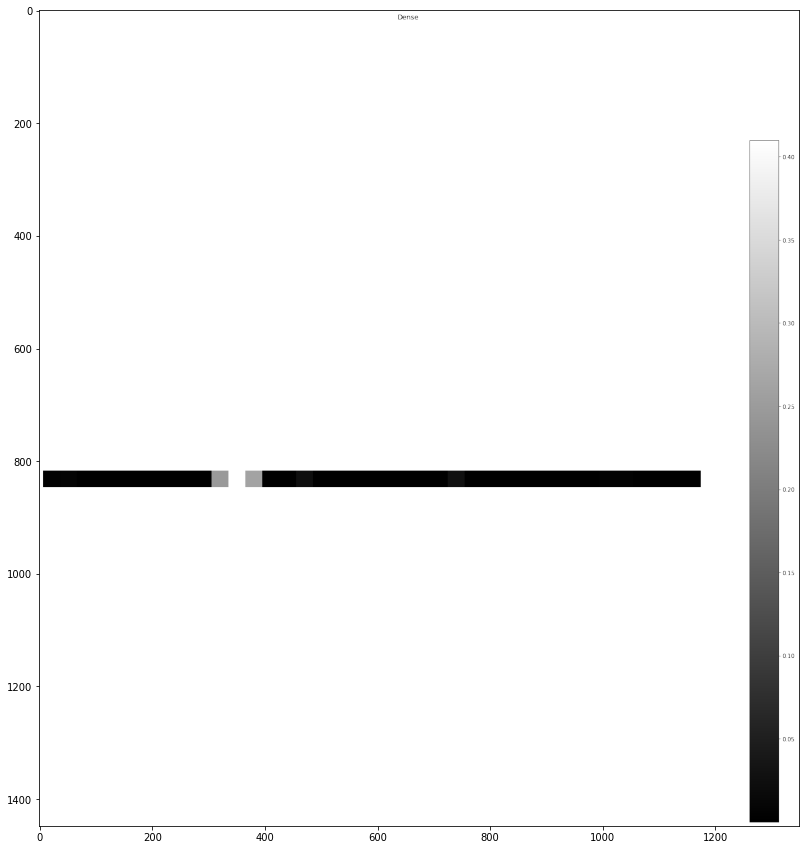

heatmaps: 0_Reshape_input.png


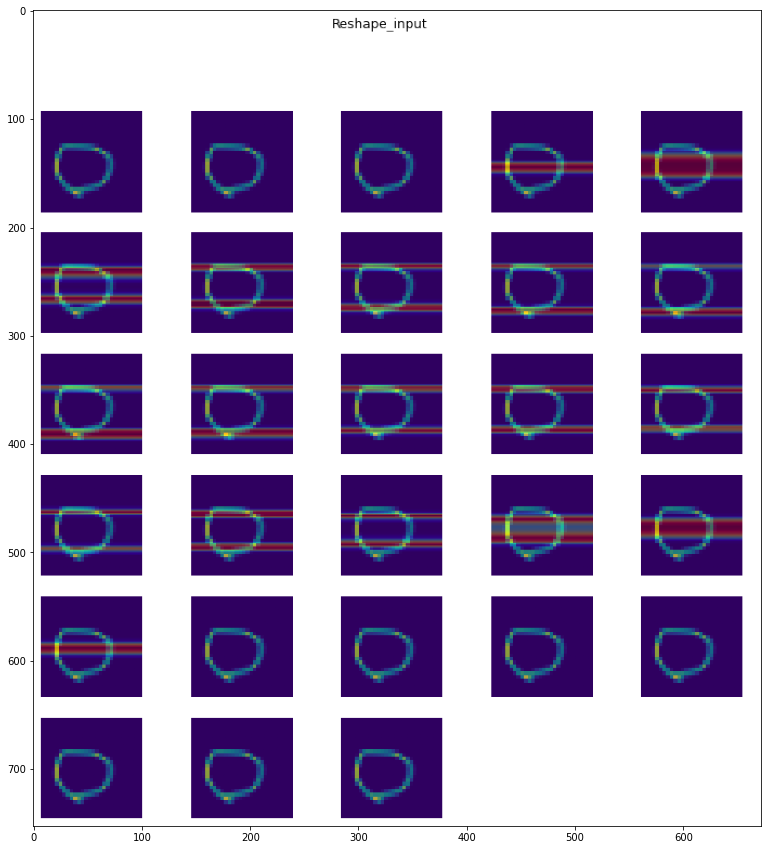

heatmaps: 1_Reshape.png


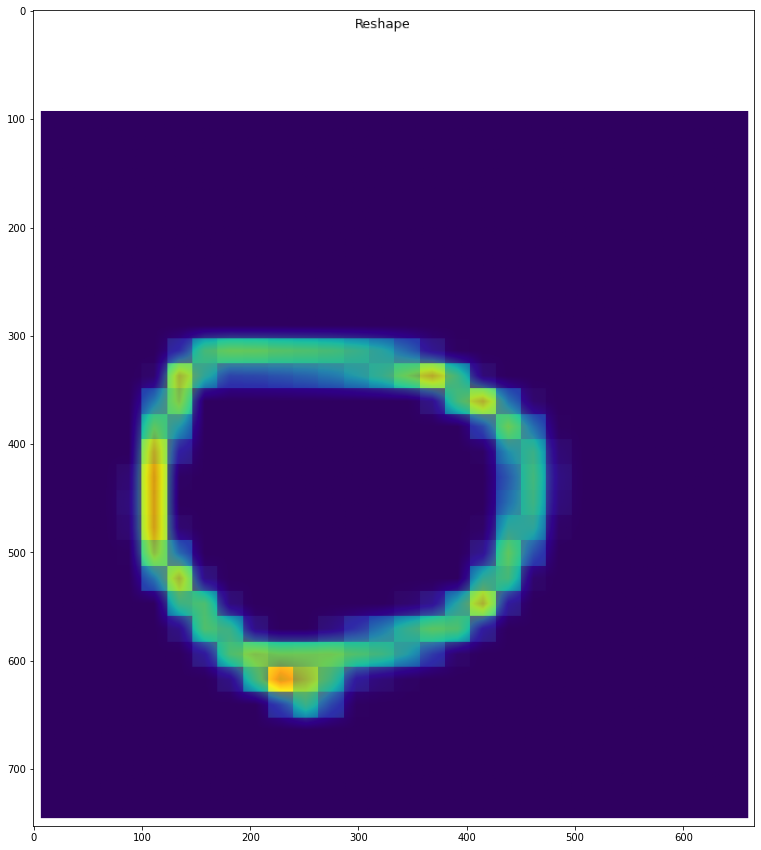

heatmaps: 2_Conv2D-1.png


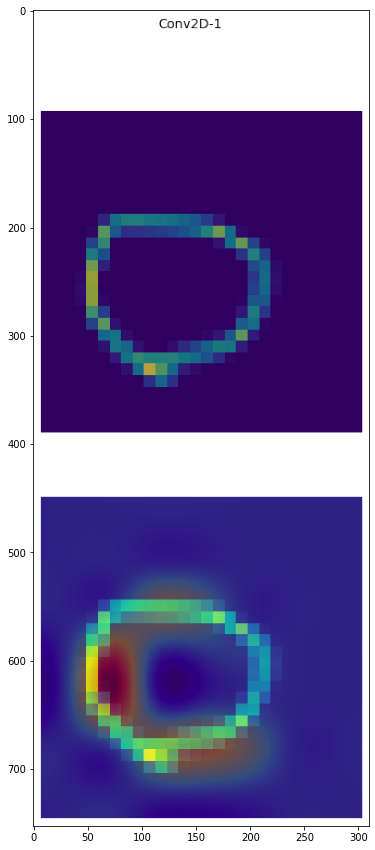

In [89]:
printActivationsAndHeatmaps = True
printHeight = 15.0
printWidth = 15.0

os.chdir('/home/jovyan/Northwestern/MSDS458/Spring2020/CNN_Shapes')
curwd = os.getcwd()

def printMaps(folder, imgType, imgHeight, imgWidth):
    for file in files(folder):  
        print(imgType + ': ' + file)
        img = mpimg.imread(folder + '/' + file)
        plt.figure(figsize=(imgHeight, imgWidth))
        plt.imshow(img)
        plt.show()
    return()

# items to print was defined in the previous cell and identifies which shapes we have processed
for indx in itemsToPrint:
    if (printActivationsAndHeatmaps):
        print('====================================================================================================')
        print('Processing shape ' + str(indx))
        print('====================================================================================================')

        folderToPrint = curwd + '/activations/shape_'+str(indx)
        printMaps(folderToPrint, 'activations', printHeight, printWidth)

        folderToPrint = curwd + '/heatmaps/shape_'+str(indx)
        printMaps(folderToPrint, 'heatmaps', printHeight, printWidth)

# 7) test model
### run model with test data

In [90]:
testResults = model(x_test)

### visualize test results...what worked and what didn't...are there patterns...

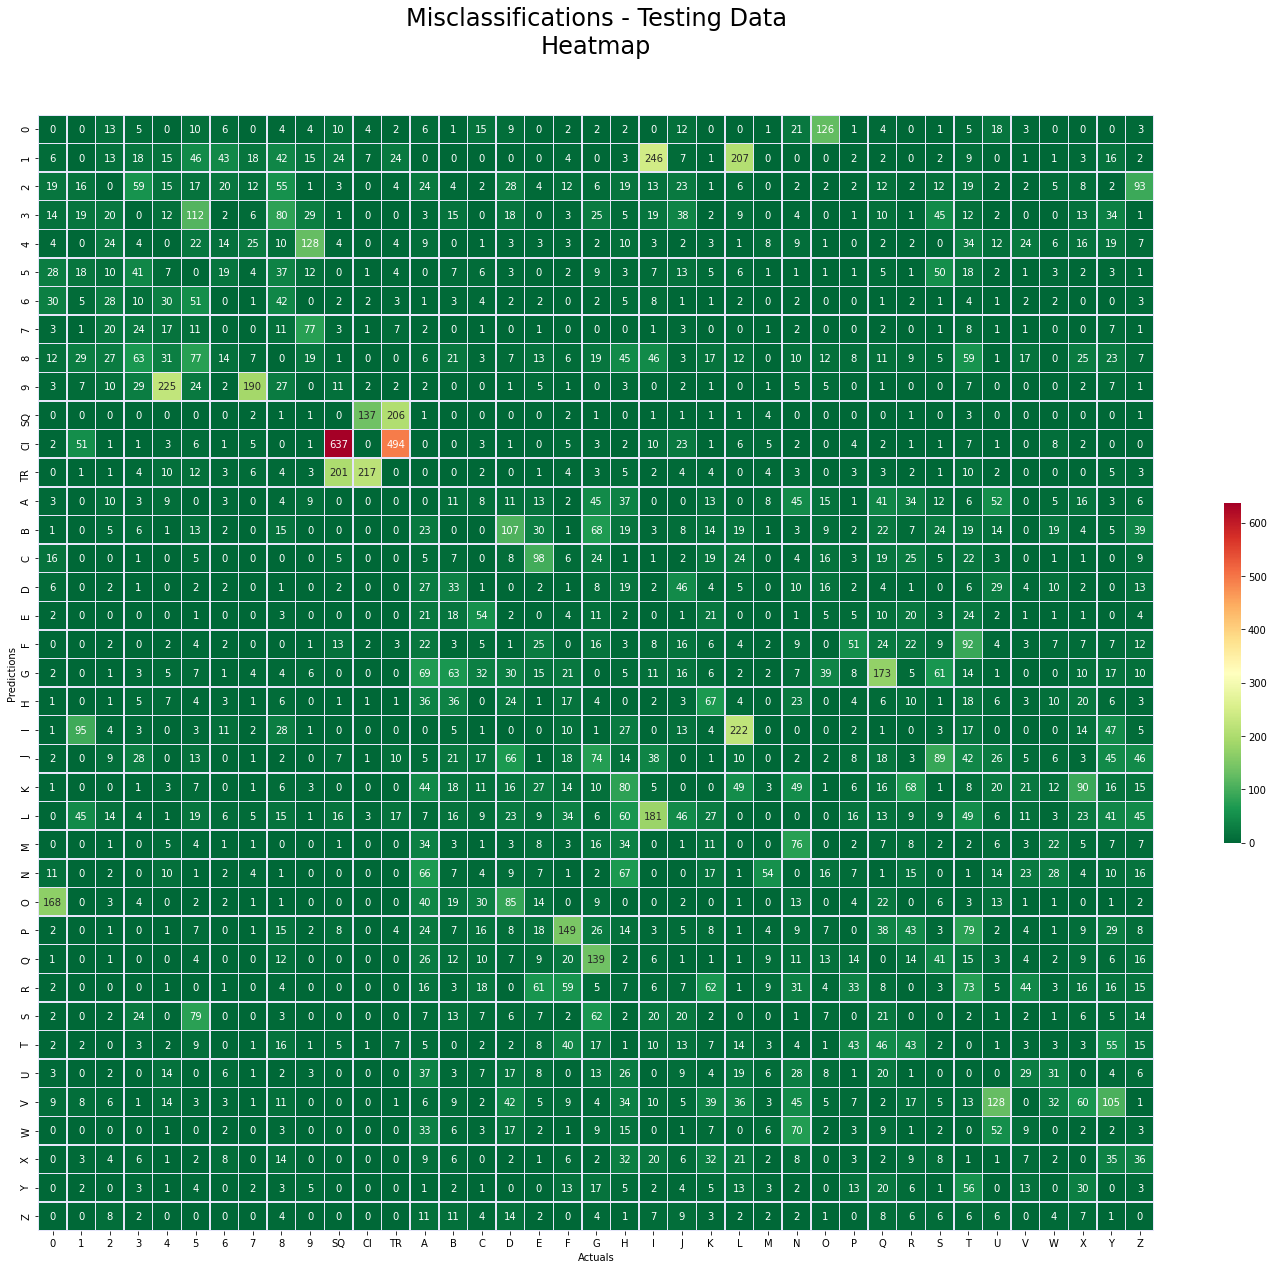

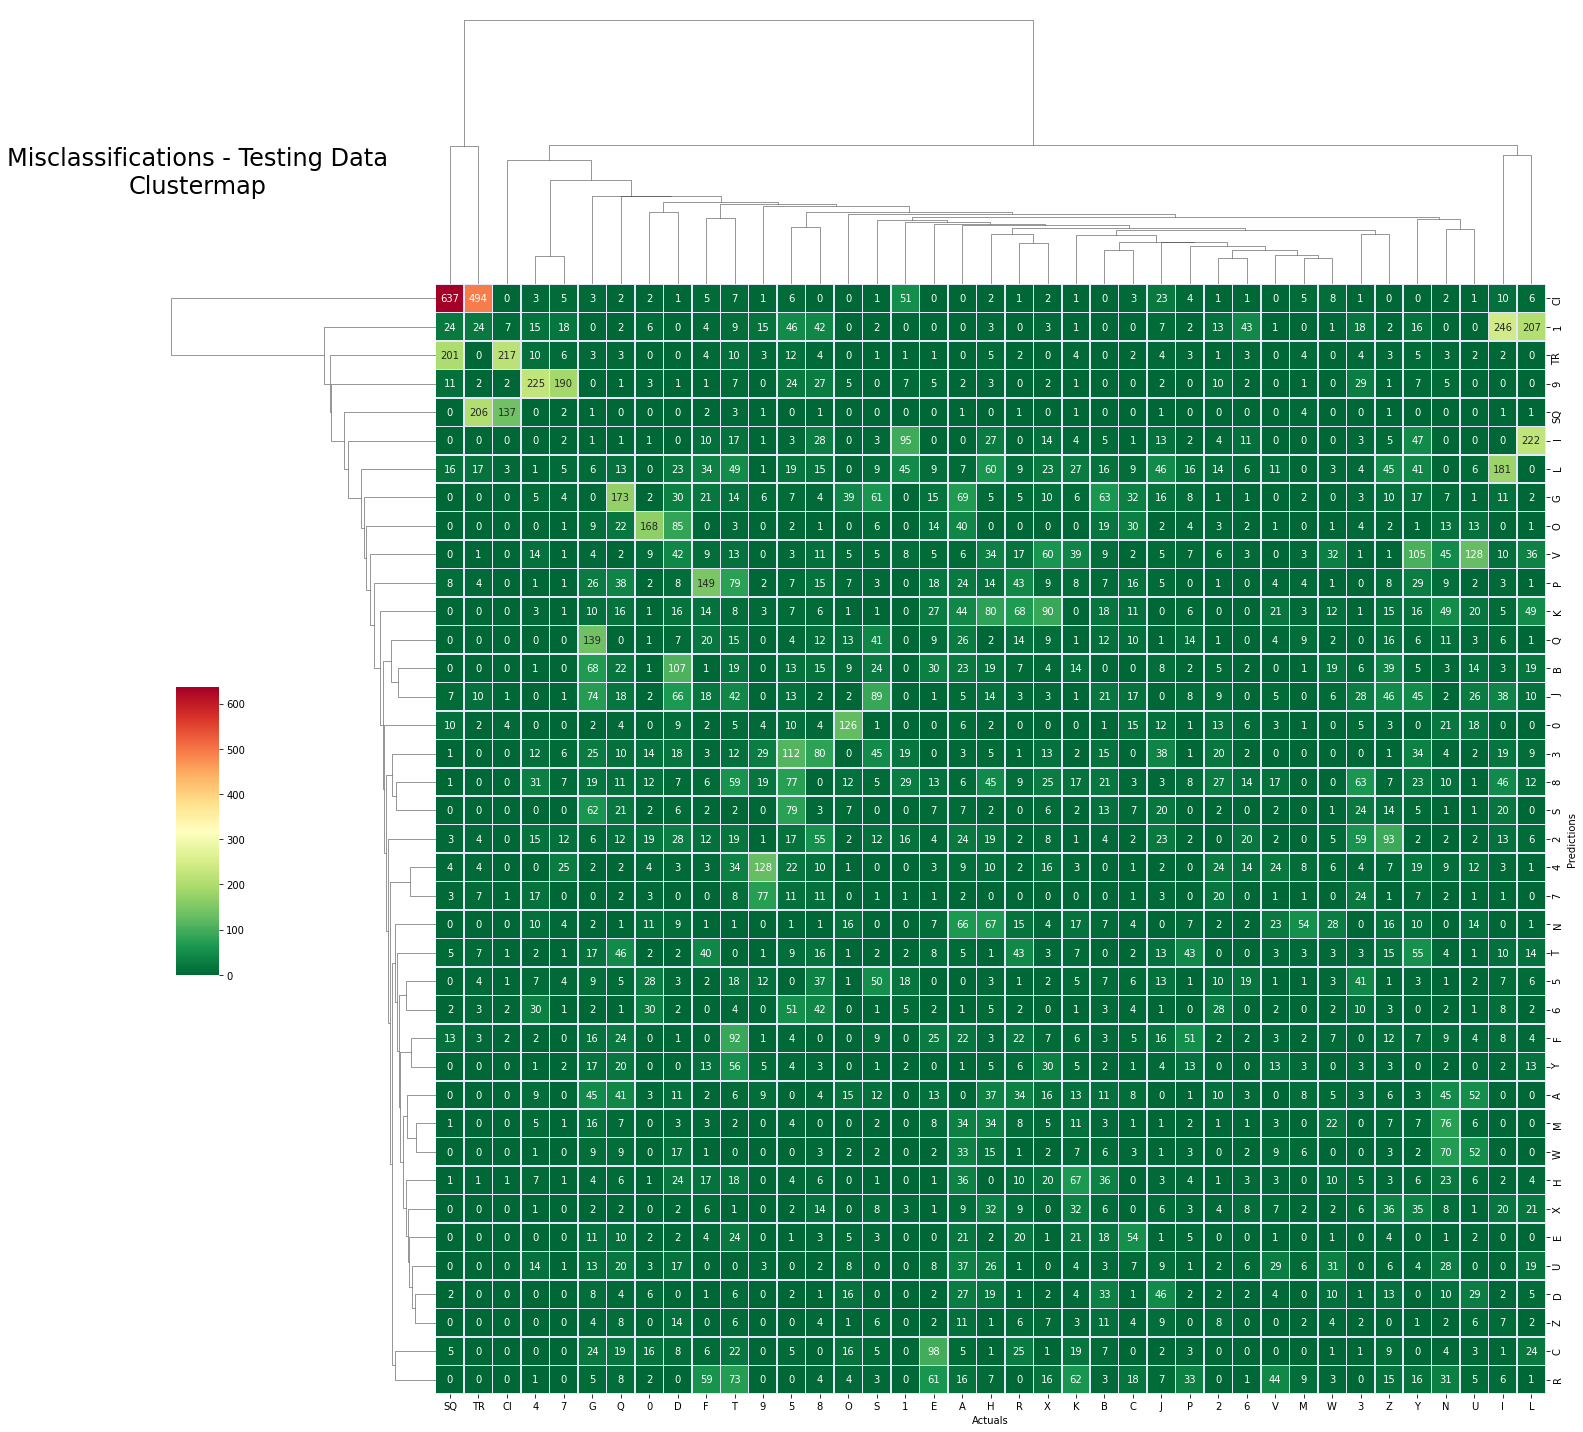

In [91]:
import seaborn as sns
# look at observations classified incorrectly
#   set the variable 'maxIncorrectToPrint' to a number of incorrect letters you want to print
#   set the variable 'maxIncorrecToPrint' to a large number (or np.inf) to print all
maxIncorrectToPrint = 20
currentPrintCount = 0

x_axis_labels = y_axis_labels

preds = []
acts = []
for indx in range(testResults.shape[0]):
    prediction = np.argmax(testResults[indx])
    actual = y_test[indx]
    preds.append(prediction)
    acts.append(actual)

# crosstab accuracy
df = pd.DataFrame(list(zip(preds, acts)), 
               columns =['Predictions', 'Actuals']) 
shapeAccuracyResults = pd.crosstab(index=df["Predictions"], 
                            columns=df["Actuals"],
                             margins=False)   # Include row and column totals
         
# store data for plot percent misclassifications   
colSums = np.sum(shapeAccuracyResults, axis=0)
colSums = np.array(colSums)
diagVals = np.diagonal(shapeAccuracyResults)

dfResult = pd.DataFrame({'Total':colSums, 'Correct':diagVals})
dfResult['PctCorrect'] = dfResult['Correct']/dfResult['Total']
dfResult['Label'] = ['0','1','2','3','4','5','6','7','8','9','SQ','CI','TR','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'] 
        
# we only want to show misclassifications in the heatmap so 0 the diagonal        
np.fill_diagonal(shapeAccuracyResults.values,0)

# misclassifications by label
fig = plt.figure(figsize=(25, 25))
sns.heatmap(shapeAccuracyResults,
            cmap='RdYlGn_r',
            annot=True,
            fmt=".0f",
            linewidths=0.5,
            linecolor='lavender',
            annot_kws={'size':10},
            cbar=True,
            cbar_kws={"shrink": .25},
            square=True,
            xticklabels=x_axis_labels,
            yticklabels=y_axis_labels)
plt.title('Misclassifications - Testing Data\nHeatmap\n\n', fontsize = 24)
plt.show()

# misclassifications clustered to help identify patterns in the misclas
sns.clustermap(shapeAccuracyResults,
            cmap='RdYlGn_r',
            annot=True,
            fmt=".0f",
            linewidths=0.5,
            linecolor='lavender',
            annot_kws={'size':10},
            figsize=(20,20),
            cbar_pos=(.02, .32, .03, .2),
            xticklabels=x_axis_labels,
            yticklabels=y_axis_labels)
plt.title('Misclassifications - Testing Data\nClustermap\n\n', y=2.5, fontsize = 24)
plt.show()

### plot percent accuracy by label...what worked and what didn't

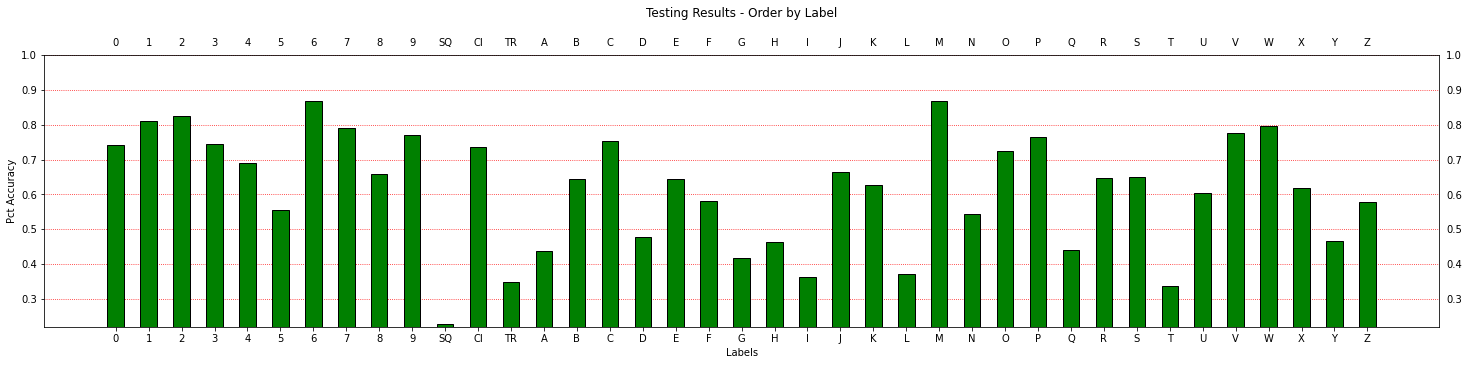

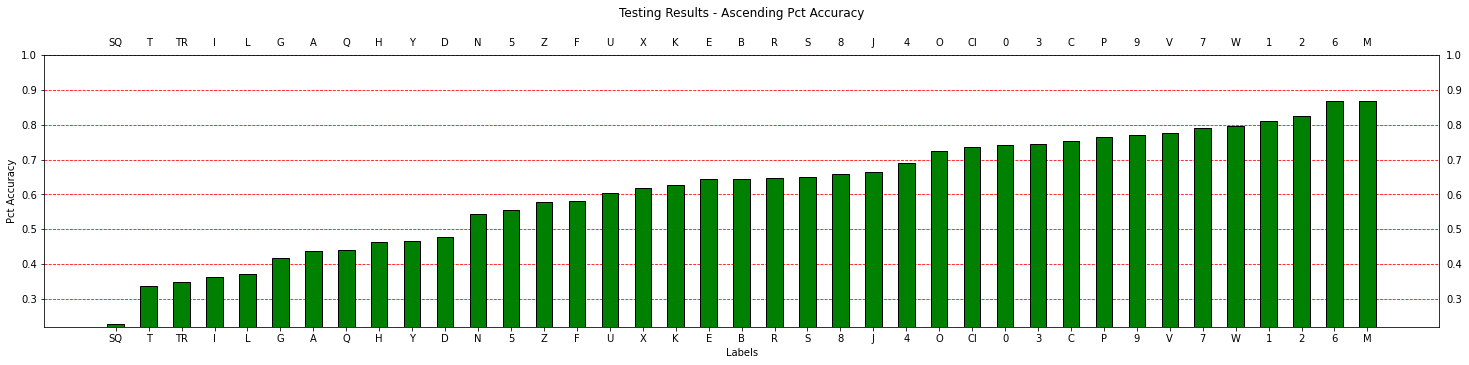

In [92]:
import math

# plot pct correct
fig = plt.figure(figsize = (25,5)) 
plt.bar(dfResult.Label, dfResult.PctCorrect, color ='green', width=0.5, edgecolor = 'black',zorder=3) 
plt.tick_params(labeltop=True, labelright=True)
plt.ylim(math.floor(min(dfResult.PctCorrect)*100)/100,1)
plt.grid(color='red',ls='dotted',axis='y')
plt.xlabel("Labels") 
plt.ylabel("Pct Accuracy") 
plt.title("Testing Results - Order by Label\n") 
plt.show()

# plot ascending pct correct
dfResult.sort_values('PctCorrect',inplace=True)

fig = plt.figure(figsize = (25,5)) 
plt.bar(dfResult.Label, dfResult.PctCorrect, color ='green', width=0.5, edgecolor = 'black',zorder=3) 
plt.tick_params(labeltop=True, labelright=True)
plt.ylim(math.floor(min(dfResult.PctCorrect)*100)/100,1)
plt.grid(color='red',ls='dashed',axis='y')
plt.xlabel("Labels") 
plt.ylabel("Pct Accuracy")
plt.title("Testing Results - Ascending Pct Accuracy\n") 
plt.show()

<br> 
<br> 
<br> 
<br> 

# 8) next steps...

### analyze results and iterate through possible model and data enhancements to improve results and broaden your understanding of all topics covered in the notebook, including, but not limited to python, tensorflow, keras, convolutional neural networks, keract, layer visualizations, creating training and testing datasets, data transformation, creating models, training models, testing models, and reporting results 
<br> 
<br> 
<br> 
<br> 

# 9) submission

### a) write a report, chicago style, with the following sections:
* objective/goals
* data description (discuss any changes you performed on the data to meet your objectives)
* test plan
* iterations performed on test plan
  + test execution
  + results (expected/realized)
  + changes performed (discuss what you changed and why)
* summarize your results and what you learned
* next steps
* appendices

### b) attach your final python notebook (full completed run saved as pdf file (if you have latex installed) or html file otherwise)